In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understanding the Dataset Structure

In [ ]:
# Load the CSV file into a DataFrame
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')
df_goodreads.head()

,ID,Author,Title,URL,SeriesName,Summary,Genres,Score,RatingsCount,ReviewsCount,Pages,PublishedDate,Popularity_ReadingNow,Popularity_Wishlisted
0,35053870,sarina bowen,brooklynaire,https://www.goodreads.com/book/show/35053870-b...,Brooklyn Bruisers #4,"You’d think a billion dollars, a professional ...","Romance, Sports, Sports Romance, Contemporary,...",4.07,20705,2322,298,2018-02-12,2261,13100
1,28869598,sarina bowen,hard hitter,https://www.goodreads.com/book/show/28869598-h...,Brooklyn Bruisers #2,"He’s a fighter in the rink, but he’s about to ...","Romance, Sports, Sports Romance, Contemporary,...",4.05,10818,1049,336,2017-01-03,495,5907
2,30627346,sarina bowen,pipe dreams,https://www.goodreads.com/book/show/30627346-p...,Brooklyn Bruisers #3,"A goalie has to trust his instincts, even when...","Romance, Sports, Sports Romance, Contemporary,...",3.92,9532,975,336,2017-05-02,348,5180
3,17561022,j. clare,stranded with a billionaire,https://www.goodreads.com/book/show/17561022-s...,Billionaire Boys Club #1,The Billionaire Boys Club is a secret society ...,"Romance, Contemporary Romance, Contemporary, E...",3.82,14878,1009,215,2013-04-16,335,8684
4,43728457,j. clare,beauty and the billionaire,https://www.goodreads.com/book/show/43728457-b...,Dirty Fairy Tales #1,Ruthless Bastard. White Knight. But I just cal...,"Romance, Contemporary, Contemporary Romance, E...",3.85,9954,691,336,2019-01-27,15700,7770


In [ ]:
# Check the shape of the DataFrame
num_rows, num_columns = df_goodreads.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 105 rows and 14 columns.


In [ ]:
# Display data types of each column
print("Data types of each column:\n")
print(df_goodreads.dtypes)

# Check for missing values in each column
print("\nNumber of missing values in each column:\n")
print(df_goodreads.isnull().sum())

Data types of each column:

ID                         int64
Author                    object
Title                     object
URL                       object
SeriesName                object
Summary                   object
Genres                    object
Score                    float64
RatingsCount               int64
ReviewsCount               int64
Pages                      int64
PublishedDate             object
Popularity_ReadingNow      int64
Popularity_Wishlisted      int64
dtype: object

Number of missing values in each column:

ID                       0
Author                   0
Title                    0
URL                      0
SeriesName               0
Summary                  0
Genres                   0
Score                    0
RatingsCount             0
ReviewsCount             0
Pages                    0
PublishedDate            0
Popularity_ReadingNow    0
Popularity_Wishlisted    0
dtype: int64


# 2. Descriptive Statistics of Numerical Variables

In [ ]:
import pandas as pd

# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Convert the 'PublishedDate' column to datetime format and extract only the year
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].dt.year

# Drop rows with missing 'PublishedDate'
df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Convert 'PublishedDate' to integer
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].astype(int)

# Specify the numerical columns for descriptive statistics
numerical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Function to calculate and print descriptive statistics
def descriptive_stats(df, column):
    print(f"Descriptive statistics for {column}:\n")

    # Mean
    mean_value = df[column].mean()
    print(f"Mean: {mean_value}")

    # Median
    median_value = df[column].median()
    print(f"Median: {median_value}")

    # Mode
    mode_value = df[column].mode()[0]  # mode() returns a series, take the first element
    print(f"Mode: {mode_value}")

    # Standard deviation
    std_dev = df[column].std()
    print(f"Standard Deviation: {std_dev}")

    # Range
    range_value = df[column].max() - df[column].min()
    print(f"Range: {range_value}")

    # Minimum
    min_value = df[column].min()
    print(f"Min: {min_value}")

    # Maximum
    max_value = df[column].max()
    print(f"Max: {max_value}")

    # Percentiles
    percentile_25 = df[column].quantile(0.25)
    percentile_50 = df[column].quantile(0.50)
    percentile_75 = df[column].quantile(0.75)

    print(f"25%: {percentile_25}")
    print(f"50% (Median): {percentile_50}")
    print(f"75%: {percentile_75}")

    print("\n" + "="*50 + "\n")

# Loop through the numerical columns and calculate descriptive statistics
for column in numerical_columns:
    descriptive_stats(df_goodreads, column)

Descriptive statistics for Score:

Mean: 3.989333333333333
Median: 4.01
Mode: 4.05
Standard Deviation: 0.21215590542129198
Range: 1.21
Min: 3.26
Max: 4.47
25%: 3.86
50% (Median): 4.01
75%: 4.14


Descriptive statistics for RatingsCount:

Mean: 39644.60952380952
Median: 11558.0
Mode: 146
Standard Deviation: 105271.49990359134
Range: 929738
Min: 146
Max: 929884
25%: 3227.0
50% (Median): 11558.0
75%: 30630.0


Descriptive statistics for ReviewsCount:

Mean: 3548.209523809524
Median: 975.0
Mode: 49
Standard Deviation: 9898.746074139546
Range: 86559
Min: 25
Max: 86584
25%: 339.0
50% (Median): 975.0
75%: 2474.0


Descriptive statistics for Pages:

Mean: 311.8095238095238
Median: 336.0
Mode: 336
Standard Deviation: 108.28888493623248
Range: 458
Min: 72
Max: 530
25%: 244.0
50% (Median): 336.0
75%: 382.0


Descriptive statistics for Popularity_ReadingNow:

Mean: 4666.07619047619
Median: 1867.0
Mode: 0
Standard Deviation: 7767.0535729887715
Range: 57700
Min: 0
Max: 57700
25%: 436.0
50% (Median):

# Check for Normality with Shapiro-Wilk Test



In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Convert the 'PublishedDate' column to datetime format and extract only the year
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].dt.year

# Drop rows with missing 'PublishedDate'
df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Convert 'PublishedDate' to integer
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].astype(int)

# Specify the numerical columns for the Shapiro-Wilk normality test
numerical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Function to perform the Shapiro-Wilk normality test
def check_normality(df, column):
    stat, p_value = shapiro(df[column].dropna())  # Shapiro test ignores missing values
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Interpret the result
    if p_value > 0.05:
        print(f"The data in {column} looks normally distributed (fail to reject H0).\n")
    else:
        print(f"The data in {column} does not look normally distributed (reject H0).\n")

    print("="*50)

# Loop through the numerical columns and perform Shapiro-Wilk test for normality
for column in numerical_columns:
    check_normality(df_goodreads, column)

Shapiro-Wilk test for Score:
Test statistic: 0.9880443630395445
P-value: 0.475334993632342
The data in Score looks normally distributed (fail to reject H0).

Shapiro-Wilk test for RatingsCount:
Test statistic: 0.34874594643150847
P-value: 1.7155297130560512e-19
The data in RatingsCount does not look normally distributed (reject H0).

Shapiro-Wilk test for ReviewsCount:
Test statistic: 0.3396818188559274
P-value: 1.2977364430606935e-19
The data in ReviewsCount does not look normally distributed (reject H0).

Shapiro-Wilk test for Pages:
Test statistic: 0.9663018562428517
P-value: 0.00897214850017182
The data in Pages does not look normally distributed (reject H0).

Shapiro-Wilk test for Popularity_ReadingNow:
Test statistic: 0.5896019051387433
P-value: 1.1243729112711123e-15
The data in Popularity_ReadingNow does not look normally distributed (reject H0).

Shapiro-Wilk test for Popularity_Wishlisted:
Test statistic: 0.427056013652543
P-value: 2.1805661034243807e-18
The data in Popularit

# Visualization of Distributions

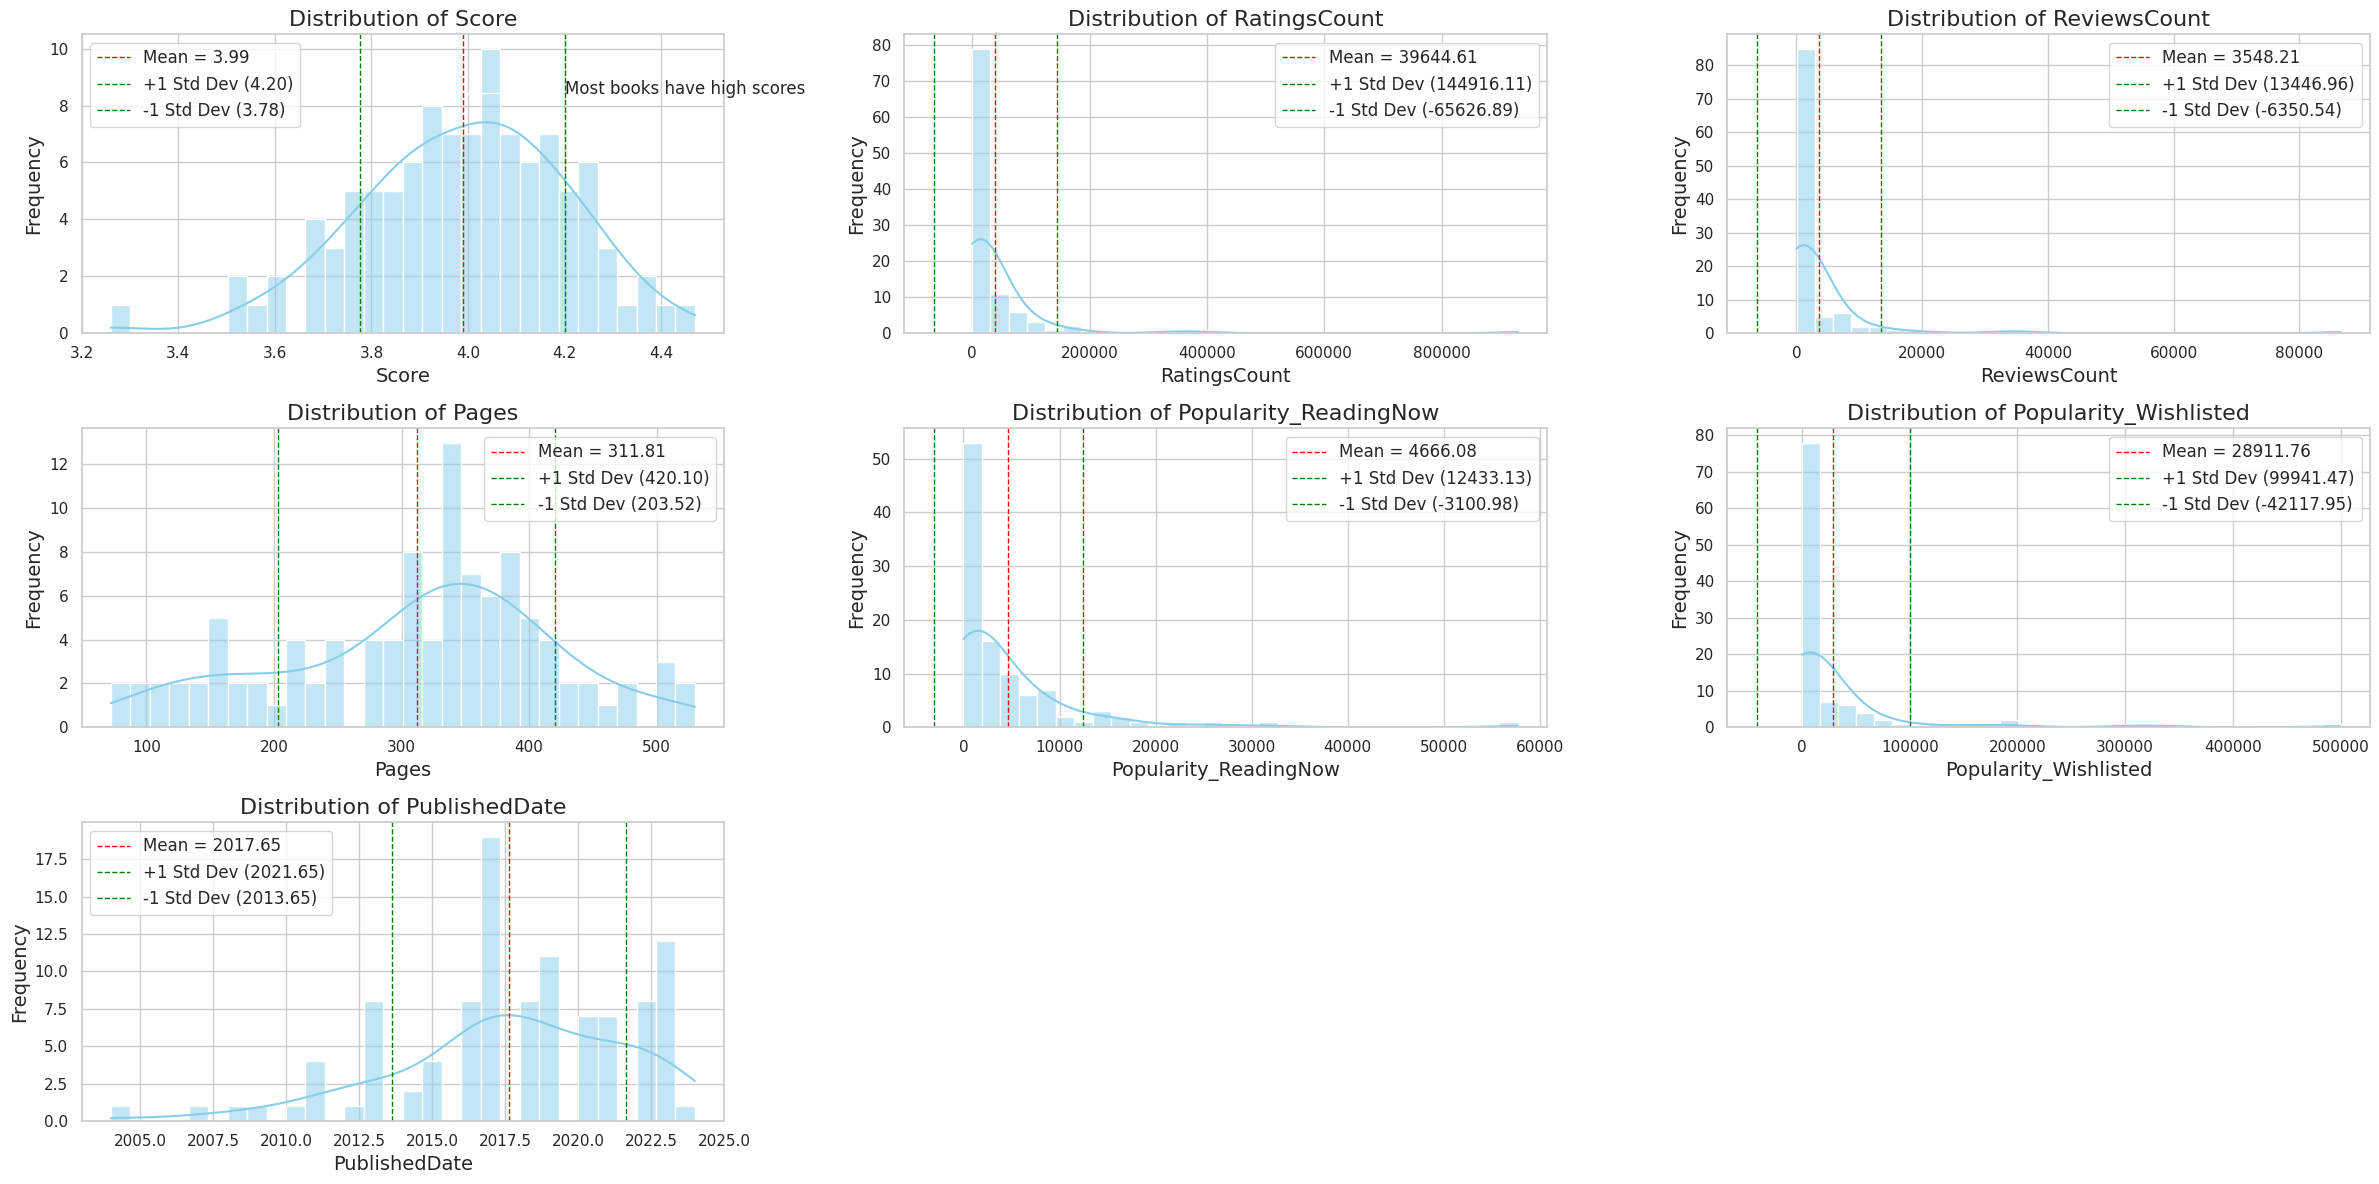

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Combined Visualization of Numerical Variables (Without Log Transformation)

# Define the list of numerical variables (excluding PublishedYear for now if it's absent)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Plot histogram and KDE
    sns.histplot(df_goodreads[var], bins=30, kde=True, color='skyblue', ax=ax)

    # Calculate mean and standard deviation
    mean = df_goodreads[var].mean()
    std = df_goodreads[var].std()

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels
    ax.set_title(f'Distribution of {var}', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12)

    # Optional annotations
    if var == 'Score':
        ax.annotate('Most books have high scores', xy=(mean, ax.get_ylim()[1]*0.8),
                    xytext=(mean + std, ax.get_ylim()[1]*0.8),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the combined figure
plt.show()


<ipython-input-9-0b4d0bef8cf6>:85: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


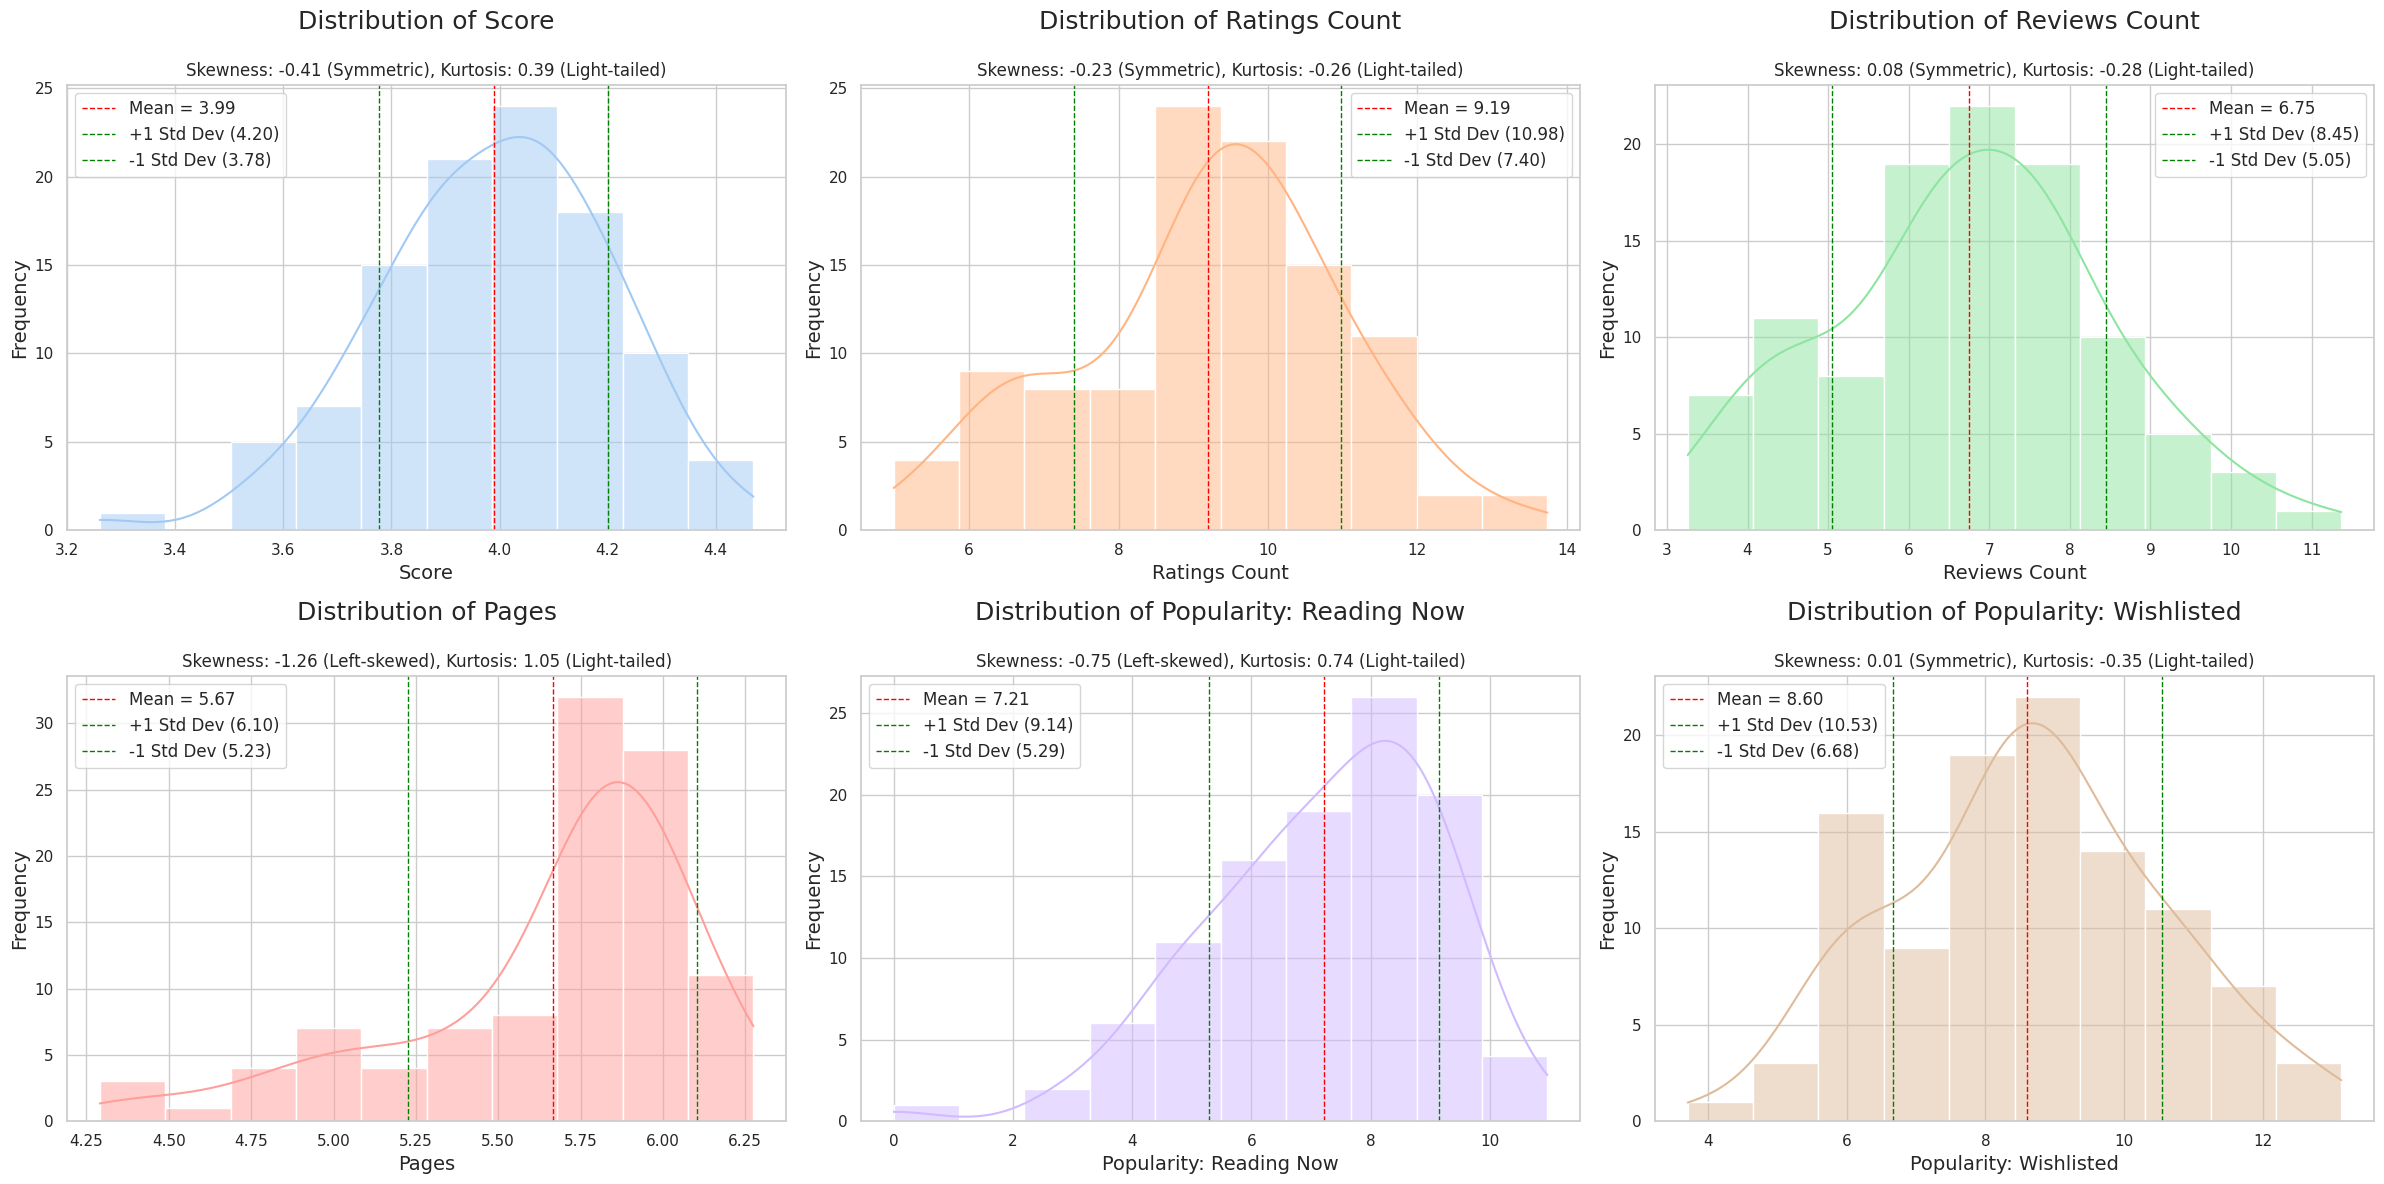

<ipython-input-9-0b4d0bef8cf6>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PublishedDate', data=df_goodreads, palette='pastel')


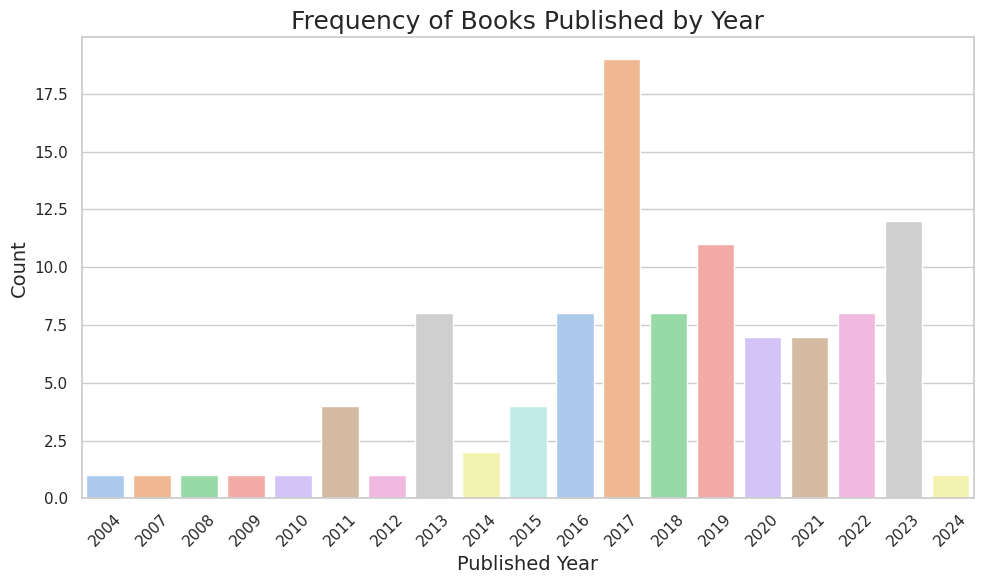

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Define the list of numerical variables (excluding PublishedDate for histogram)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages',
}

# Define log-transformed variables
log_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'Pages']

# Define pastel colors for each variable
pastel_colors = sns.color_palette("pastel")

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots for numerical variables
fig, axes = plt.subplots(rows, cols, figsize=(24, 12), constrained_layout=True)  # Adjust layout with constrained_layout=True
axes = axes.flatten()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Apply log transformation to skewed variables, exclude PublishedDate from log transformation
    if var in log_vars:
        data = np.log1p(df_goodreads[var])
    else:
        data = df_goodreads[var]

    # Get the display name for the variable
    title_var = name_mapping[var]

    # Calculate dynamic binning
    bin_count = int(np.sqrt(len(data)))  # Dynamic binning based on the size of the data

    # Plot histogram and KDE with distinct pastel colors
    sns.histplot(data, bins=bin_count, kde=True, color=pastel_colors[idx % len(pastel_colors)], ax=ax)

    # Calculate mean, standard deviation, skewness, and kurtosis
    mean = data.mean()
    std = data.std()
    skewness = skew(data)
    kurt = kurtosis(data)

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels with skewness and kurtosis annotations
    skewness_annotation = "Left-skewed" if skewness < -0.5 else ("Right-skewed" if skewness > 0.5 else "Symmetric")
    kurtosis_annotation = "Heavy-tailed" if kurt > 3 else "Light-tailed"

    # Set the main title font larger than the annotation font
    ax.set_title(f'Distribution of {title_var}', fontsize=18, pad=40)  # Padding for title

    # Lower the annotation closer to the plot and adjust the font size
    ax.text(0.5, 1.03, f'Skewness: {skewness:.2f} ({skewness_annotation}), Kurtosis: {kurt:.2f} ({kurtosis_annotation})',
            transform=ax.transAxes, fontsize=12, ha='center', va='center')  # Lowered placement closer to the plot

    ax.set_xlabel(title_var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12, loc='best')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout using tight layout and constrained layout
plt.tight_layout()
plt.show()

# Plot for 'PublishedDate'
plt.figure(figsize=(10, 6))
sns.countplot(x='PublishedDate', data=df_goodreads, palette='pastel')
plt.title('Frequency of Books Published by Year', fontsize=18)  # Main title larger for bar plot
plt.xlabel('Published Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-10-d0ed870ec225>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,
<ipython-input-10-d0ed870ec225>:28: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,


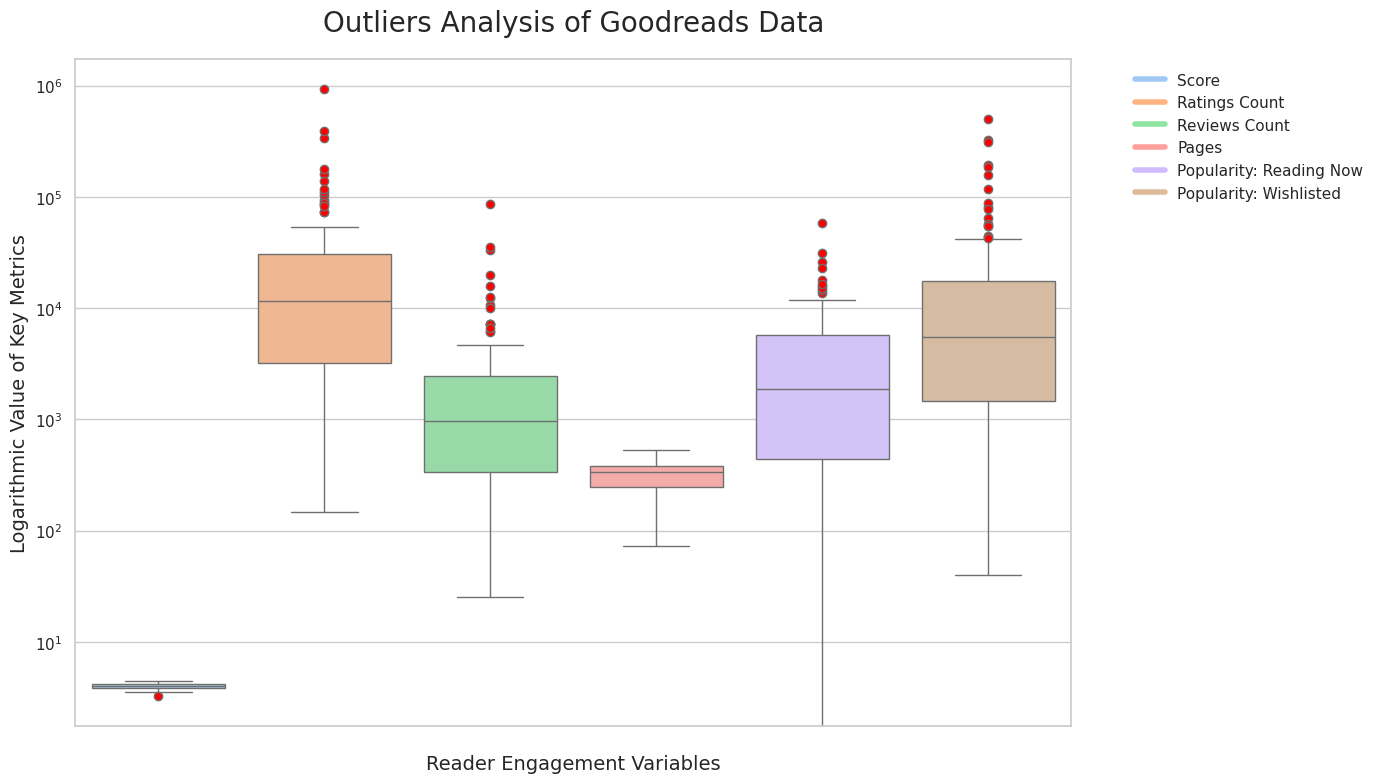

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages',
}

# List of numerical variables to analyze for outliers
outlier_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Assuming df_goodreads contains the dataset and mapping to readable names
df_melted = df_goodreads[outlier_vars].rename(columns=name_mapping).melt(var_name='Variable', value_name='Value')

# Set up pastel color palette
pastel_palette = sns.color_palette("pastel")

# Set up the matplotlib figure for a single plot
plt.figure(figsize=(14, 8))

# Create a boxplot with seaborn
sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

# Adjust the y-axis to use a log scale
plt.yscale('log')

# Title moved slightly higher for clarity and font adjusted
plt.title('Outliers Analysis of Goodreads Data', fontsize=20, pad=20)

# Modify the x-axis label to be more descriptive and adjust its position (slightly lower)
plt.xlabel('Reader Engagement Variables', fontsize=14, labelpad=20)

# Modify the y-axis label for clarity
plt.ylabel('Logarithmic Value of Key Metrics', fontsize=14)

# Remove the x-axis tick labels for each variable
plt.xticks([])

# Add gridlines
plt.grid(True)

# Create a legend with color coding but without the title
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in pastel_palette]
labels = [name_mapping[var] for var in outlier_vars]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Show the final plot
plt.tight_layout()
plt.show()

# Selecting the Appropriate Statistical Test

In [ ]:
# Install necessary packages (uncomment if not already installed)
!pip install pandas numpy scipy statsmodels seaborn matplotlib

# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file into a DataFrame
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Display the first few rows to verify
df_goodreads.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Author,Title,URL,SeriesName,Summary,Genres,Score,RatingsCount,ReviewsCount,Pages,PublishedDate,Popularity_ReadingNow,Popularity_Wishlisted
0,35053870,sarina bowen,brooklynaire,https://www.goodreads.com/book/show/35053870-b...,Brooklyn Bruisers #4,"You’d think a billion dollars, a professional ...","Romance, Sports, Sports Romance, Contemporary,...",4.07,20705,2322,298,2018-02-12,2261,13100
1,28869598,sarina bowen,hard hitter,https://www.goodreads.com/book/show/28869598-h...,Brooklyn Bruisers #2,"He’s a fighter in the rink, but he’s about to ...","Romance, Sports, Sports Romance, Contemporary,...",4.05,10818,1049,336,2017-01-03,495,5907
2,30627346,sarina bowen,pipe dreams,https://www.goodreads.com/book/show/30627346-p...,Brooklyn Bruisers #3,"A goalie has to trust his instincts, even when...","Romance, Sports, Sports Romance, Contemporary,...",3.92,9532,975,336,2017-05-02,348,5180
3,17561022,j. clare,stranded with a billionaire,https://www.goodreads.com/book/show/17561022-s...,Billionaire Boys Club #1,The Billionaire Boys Club is a secret society ...,"Romance, Contemporary Romance, Contemporary, E...",3.82,14878,1009,215,2013-04-16,335,8684
4,43728457,j. clare,beauty and the billionaire,https://www.goodreads.com/book/show/43728457-b...,Dirty Fairy Tales #1,Ruthless Bastard. White Knight. But I just cal...,"Romance, Contemporary, Contemporary Romance, E...",3.85,9954,691,336,2019-01-27,15700,7770


In [ ]:
# List of variables to log-transform
variables_to_log = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Apply log transformation (add 1 to avoid log(0))
for var in variables_to_log:
    df_goodreads[f'Log_{var}'] = np.log1p(df_goodreads[var])

# Verify transformation
df_goodreads[['RatingsCount', 'Log_RatingsCount',
             'ReviewsCount', 'Log_ReviewsCount',
             'Popularity_ReadingNow', 'Log_Popularity_ReadingNow',
             'Popularity_Wishlisted', 'Log_Popularity_Wishlisted']].head()

,RatingsCount,Log_RatingsCount,ReviewsCount,Log_ReviewsCount,Popularity_ReadingNow,Log_Popularity_ReadingNow,Popularity_Wishlisted,Log_Popularity_Wishlisted
0,20705,9.938179,2322,7.750615,2261,7.724005,13100,9.480444
1,10818,9.289059,1049,6.956545,495,6.206576,5907,8.684063
2,9532,9.162515,975,6.883463,348,5.855072,5180,8.552753
3,14878,9.607706,1009,6.917706,335,5.817111,8684,9.069353
4,9954,9.205830,691,6.539586,15700,9.661480,7770,8.958154


**a. Spearman Correlation Analysis**

This section computes Spearman's rho and p-values between the dependent variable (Score) and each independent variable. It then applies the Holm-Bonferroni correction for multiple comparisons and calculates the effect sizes (r²).

In [ ]:
# Define dependent and independent variables
dependent_var = 'Score'
independent_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Initialize lists to store results
correlation_results = []

# Calculate Spearman correlations
for var in independent_vars:
    corr, p = spearmanr(df_goodreads[var], df_goodreads[dependent_var])
    correlation_results.append({'Variable Pair': f"{var} and {dependent_var}",
                                'Correlation': corr,
                                'P-value': p})

# Create a DataFrame for results
corr_df = pd.DataFrame(correlation_results)

# Apply Holm-Bonferroni correction
p_values = corr_df['P-value'].values
reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

# Add corrected p-values and significance to the DataFrame
corr_df['Corrected P-value'] = pvals_corrected
corr_df['Significant'] = reject

# Calculate effect sizes (r²)
corr_df['Effect Size (r²)'] = corr_df['Correlation']**2

# Reorder columns for clarity
corr_df = corr_df[['Variable Pair', 'Correlation', 'Effect Size (r²)',
                   'P-value', 'Corrected P-value', 'Significant']]

# Display the correlation results
print("### Spearman Correlation Analysis ###\n")
print(corr_df.to_string(index=False))

### Spearman Correlation Analysis ###

                  Variable Pair  Correlation  Effect Size (r²)  P-value  Corrected P-value  Significant
         RatingsCount and Score     0.302974          0.091793 0.001680           0.005041         True
         ReviewsCount and Score     0.268840          0.072275 0.005553           0.011106         True
Popularity_ReadingNow and Score     0.383320          0.146934 0.000054           0.000217         True
Popularity_Wishlisted and Score     0.230619          0.053185 0.017940           0.017940         True


**b. Variance Inflation Factor (VIF) Calculation**

VIF assesses the multicollinearity among independent variables. High VIF values (commonly above 5 or 10) indicate problematic multicollinearity.

In [ ]:
# Select log-transformed independent variables for VIF calculation
indep_vars_log = ['Log_RatingsCount', 'Log_ReviewsCount',
                 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

# Prepare the design matrix by adding a constant
X = df_goodreads[indep_vars_log]
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Display VIF results
print("\n### Variance Inflation Factor (VIF) ###\n")
print(vif_data.to_string(index=False))


### Variance Inflation Factor (VIF) ###

                 Variable       VIF
                    const 47.994285
         Log_RatingsCount 18.563846
         Log_ReviewsCount 19.744245
Log_Popularity_ReadingNow  2.971901
Log_Popularity_Wishlisted  6.557589


**c. Spearman Correlation Matrix of Independent Variables (Transformed)**

This section creates a correlation matrix for the independent variables to visualize pairwise relationships and identify redundancy.

In [ ]:
# Calculate Spearman correlation matrix for log-transformed independent variables
corr_matrix, p_matrix = spearmanr(df_goodreads[indep_vars_log])

# Convert the correlation matrix to a DataFrame
corr_matrix_df = pd.DataFrame(corr_matrix, index=indep_vars_log, columns=indep_vars_log)

# Display the correlation matrix
print("\n### Spearman Correlation Matrix of Independent Variables (Transformed) ###\n")
print(corr_matrix_df)


### Spearman Correlation Matrix of Independent Variables (Transformed) ###

                           Log_RatingsCount  Log_ReviewsCount  \
Log_RatingsCount                   1.000000          0.972519   
Log_ReviewsCount                   0.972519          1.000000   
Log_Popularity_ReadingNow          0.744609          0.737399   
Log_Popularity_Wishlisted          0.879999          0.884323   

                           Log_Popularity_ReadingNow  \
Log_RatingsCount                            0.744609   
Log_ReviewsCount                            0.737399   
Log_Popularity_ReadingNow                   1.000000   
Log_Popularity_Wishlisted                   0.783072   

                           Log_Popularity_Wishlisted  
Log_RatingsCount                            0.879999  
Log_ReviewsCount                            0.884323  
Log_Popularity_ReadingNow                   0.783072  
Log_Popularity_Wishlisted                   1.000000  


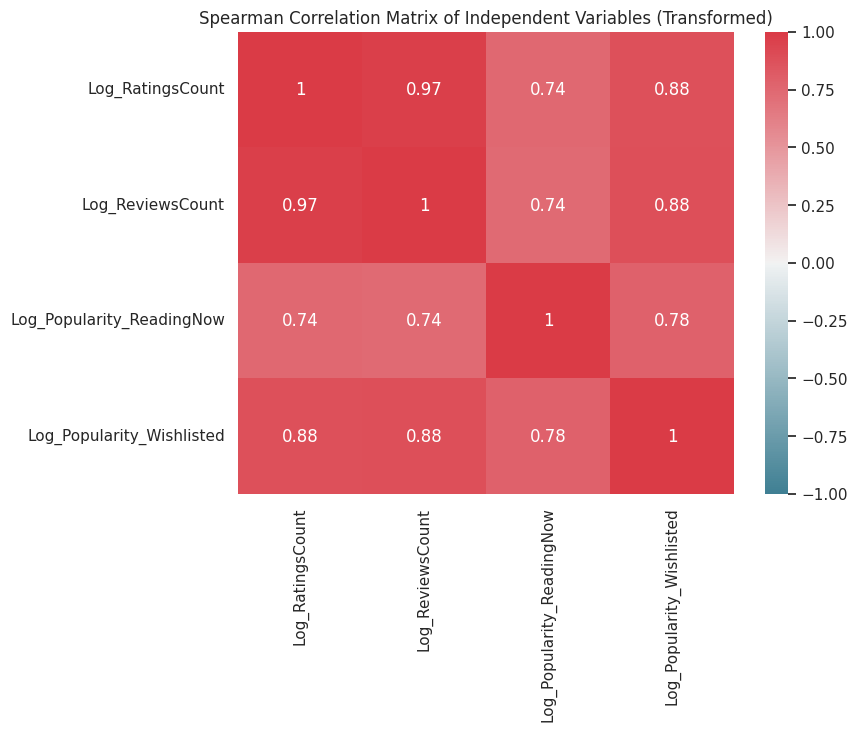

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_df, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0)

plt.title('Spearman Correlation Matrix of Independent Variables (Transformed)')
plt.show()

**d. Detailed Interpretation of Correlation and Effect Sizes**

This section provides detailed interpretations of the correlation results, including effect sizes and significance after correction.

In [ ]:
print("\n### Detailed Interpretation of Correlation and Effect Sizes ###\n")

for index, row in corr_df.iterrows():
    var_pair = row['Variable Pair']
    corr = row['Correlation']
    effect_size = row['Effect Size (r²)']
    p_val = row['P-value']
    p_corr = row['Corrected P-value']
    significant = row['Significant']

    print(f"**{var_pair}:**")
    print(f"- **Correlation (ρ):** {corr:.3f}")
    print(f"- **Effect Size (r²):** {effect_size:.3f} ({effect_size*100:.1f}% of variance explained)")
    print(f"- **P-value:** {p_val:.5f}")
    print(f"- **Corrected P-value:** {p_corr:.5f}")
    print(f"- **Significant after Correction:** {'Yes' if significant else 'No'}\n")


### Detailed Interpretation of Correlation and Effect Sizes ###

**RatingsCount and Score:**
- **Correlation (ρ):** 0.303
- **Effect Size (r²):** 0.092 (9.2% of variance explained)
- **P-value:** 0.00168
- **Corrected P-value:** 0.00504
- **Significant after Correction:** Yes

**ReviewsCount and Score:**
- **Correlation (ρ):** 0.269
- **Effect Size (r²):** 0.072 (7.2% of variance explained)
- **P-value:** 0.00555
- **Corrected P-value:** 0.01111
- **Significant after Correction:** Yes

**Popularity_ReadingNow and Score:**
- **Correlation (ρ):** 0.383
- **Effect Size (r²):** 0.147 (14.7% of variance explained)
- **P-value:** 0.00005
- **Corrected P-value:** 0.00022
- **Significant after Correction:** Yes

**Popularity_Wishlisted and Score:**
- **Correlation (ρ):** 0.231
- **Effect Size (r²):** 0.053 (5.3% of variance explained)
- **P-value:** 0.01794
- **Corrected P-value:** 0.01794
- **Significant after Correction:** Yes



# Visualizing the Results of Correlation Analysis

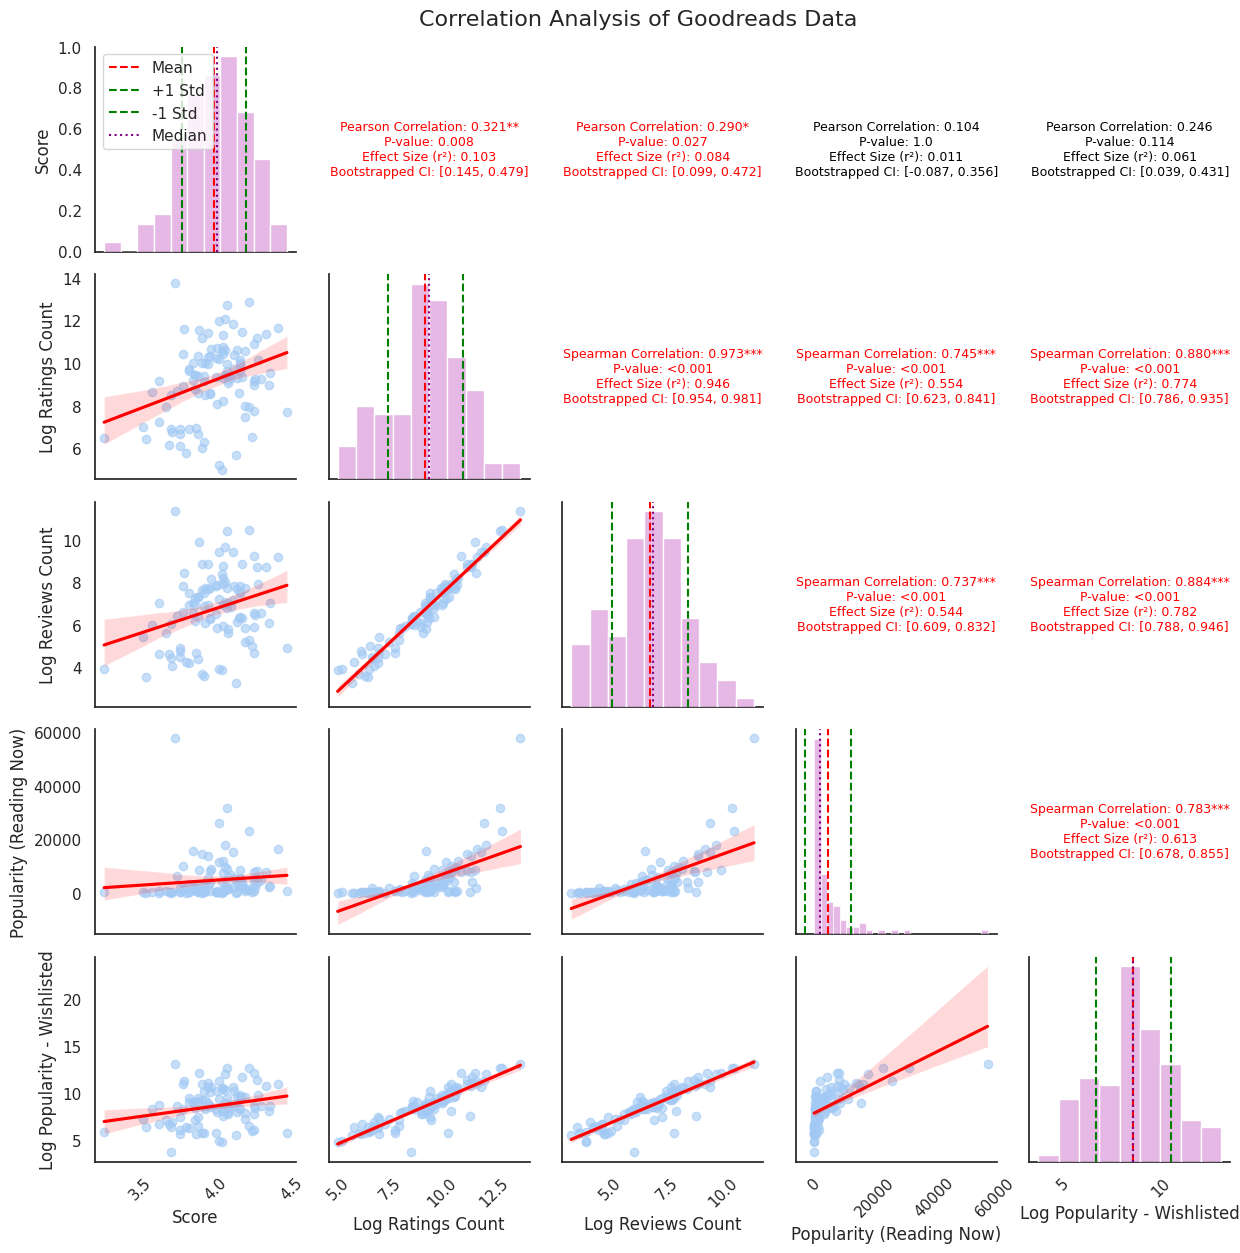

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.utils import resample
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# Assuming the dataset is already loaded as df_goodreads
# Log transformation for skewed variables
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
df_goodreads['Log_ReviewsCount'] = np.log1p(df_goodreads['ReviewsCount'])
df_goodreads['Log_Popularity_Wishlisted'] = np.log1p(df_goodreads['Popularity_Wishlisted'])

# Rename 'Popularity_ReadingNow' for consistency
df_goodreads.rename(columns={'Popularity_ReadingNow': 'Popularity: Reading Now'}, inplace=True)

# New dataframe with transformed variables
df_transformed = df_goodreads[['Score', 'Log_RatingsCount', 'Log_ReviewsCount', 'Popularity: Reading Now', 'Log_Popularity_Wishlisted']]

# Improved label names for better readability
name_mapping = {
    'Score': 'Score',
    'Log_RatingsCount': 'Log Ratings Count',
    'Log_ReviewsCount': 'Log Reviews Count',
    'Popularity: Reading Now': 'Popularity (Reading Now)',
    'Log_Popularity_Wishlisted': 'Log Popularity - Wishlisted',
}

# List of variables to be used in the plot
plot_variables = [name_mapping.get(var, var) for var in df_transformed.columns]

# Method to calculate confidence intervals using bootstrapping
def bootstrap_ci(data, func, n_bootstrap=1000, alpha=0.05):
    bootstrapped_stats = []
    for _ in range(n_bootstrap):
        sample = resample(data, replace=True)
        bootstrapped_stats.append(func(sample))
    lower = np.percentile(bootstrapped_stats, 100 * (alpha / 2))
    upper = np.percentile(bootstrapped_stats, 100 * (1 - alpha / 2))
    return lower, upper

# List to store correlation results
correlation_results = []
p_values = []

# Calculate correlations
for i, col1 in enumerate(df_transformed.columns):
    for j, col2 in enumerate(df_transformed.columns):
        if i < j:
            # Use Pearson correlation for 'Score' and Spearman for others
            if col1 == 'Score' or col2 == 'Score':
                corr, p_value = pearsonr(df_transformed[col1], df_transformed[col2])
                corr_type = 'Pearson'
            else:
                corr, p_value = spearmanr(df_transformed[col1], df_transformed[col2])
                corr_type = 'Spearman'

            # Bootstrap confidence interval
            data_for_ci = df_transformed[[col1, col2]].dropna()
            ci_lower, ci_upper = bootstrap_ci(
                data_for_ci,
                lambda data: pearsonr(data[col1], data[col2])[0] if corr_type == 'Pearson' else spearmanr(data[col1], data[col2])[0]
            )

            # If p-value < 0.001, set it to "<0.001"
            p_value_display = "<0.001" if p_value < 0.001 else np.round(p_value, 3)

            # Append the results
            correlation_results.append({
                'Variable 1': name_mapping.get(col1, col1),
                'Variable 2': name_mapping.get(col2, col2),
                'Correlation': corr,
                'P-value': p_value_display,  # Display "<0.001" for small p-values
                'Correlation Type': corr_type,
                'CI Lower': ci_lower,
                'CI Upper': ci_upper
            })
            p_values.append(p_value)

# Apply Bonferroni correction for multiple comparisons
_, corrected_p_values, _, _ = multipletests(p_values, method='bonferroni')

# Add the corrected p-values and effect sizes to the results
for i, result in enumerate(correlation_results):
    corrected_p_value_display = "<0.001" if corrected_p_values[i] < 0.001 else np.round(corrected_p_values[i], 3)
    result['Corrected P-value'] = corrected_p_value_display  # Display "<0.001" for small corrected p-values
    result['Effect Size (r²)'] = result['Correlation'] ** 2

# Convert to DataFrame
df_correlation_results = pd.DataFrame(correlation_results)

# Prepare the data for plotting with readable variable names
df_transformed_renamed = df_transformed.rename(columns=name_mapping)

# Create a PairGrid with pastel colors
sns.set(style='white', palette='pastel')
pairgrid = sns.PairGrid(df_transformed_renamed, vars=plot_variables, diag_sharey=False)

# Define a custom function to annotate the plots with statistical information
def annotate_correlation(x, y, **kws):
    var1 = x.name
    var2 = y.name

    # Find the corresponding correlation result
    result = df_correlation_results[
        ((df_correlation_results['Variable 1'] == var1) & (df_correlation_results['Variable 2'] == var2)) |
        ((df_correlation_results['Variable 1'] == var2) & (df_correlation_results['Variable 2'] == var1))
    ]

    if not result.empty:
        result = result.iloc[0]
        corr = result['Correlation']
        p_value = result['Corrected P-value']
        effect_size = result['Effect Size (r²)']
        ci_lower = result['CI Lower']
        ci_upper = result['CI Upper']
        corr_type = result['Correlation Type']

        # Determine significance level
        if p_value == "<0.001" or float(p_value) < 0.001:
            significance = '***'
        elif float(p_value) < 0.01:
            significance = '**'
        elif float(p_value) < 0.05:
            significance = '*'
        else:
            significance = ''

        # Build the annotation text
        annotation = (
            f'{corr_type} Correlation: {corr:.3f}{significance}\n'
            f'P-value: {p_value}\n'
            f'Effect Size (r²): {effect_size:.3f}\n'
            f'Bootstrapped CI: [{ci_lower:.3f}, {ci_upper:.3f}]'
        )

        # Choose color based on significance
        if significance:
            color = 'red'
        else:
            color = 'black'

        # Place the annotation in the center of the plot
        ax = plt.gca()
        ax.annotate(
            annotation,
            xy=(0.5, 0.5),
            xycoords='axes fraction',
            ha='center',
            va='center',
            fontsize=9,
            color=color,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
        )
        # Hide the axes to make the text stand out
        ax.set_axis_off()

# Function to plot scatter plots with regression lines and confidence intervals
def scatter_with_regline(x, y, **kws):
    ax = plt.gca()
    # Determine if Pearson or Spearman correlation is appropriate
    var1 = x.name
    var2 = y.name
    # Use Pearson for 'Score', Spearman for others
    if 'Score' in [var1, var2]:
        sns.regplot(x=x, y=y, ci=95, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax)
    else:
        # For Spearman, we need to sort the data
        data = pd.DataFrame({var1: x, var2: y}).dropna()
        data_sorted = data.sort_values(by=var1)
        sns.regplot(x=data_sorted[var1], y=data_sorted[var2], ci=95, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax)

# Function to plot histograms with central tendency and std deviation lines
def hist_with_stats(x, **kws):
    ax = plt.gca()
    sns.histplot(x, kde=False, color='plum', ax=ax)  # Use soft violet (plum) color for histograms
    mean = x.mean()
    std = x.std()
    # Plot mean line
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    # Plot standard deviation lines
    ax.axvline(mean + std, color='green', linestyle='--', label='+1 Std')
    ax.axvline(mean - std, color='green', linestyle='--', label='-1 Std')
    # Optionally, plot median
    median = x.median()
    ax.axvline(median, color='purple', linestyle=':', label='Median')
    # Only add a legend in the top-right plot to declutter
    if x.name == plot_variables[0]:
        ax.legend()

# Map the plots
pairgrid.map_lower(scatter_with_regline)
pairgrid.map_upper(annotate_correlation)
pairgrid.map_diag(hist_with_stats)

# Adjust labels and titles
for ax in pairgrid.axes.flatten():
    if ax:
        # Rotate x-axis labels for readability
        for label in ax.get_xticklabels():
            label.set_rotation(45)
        # Rotate y-axis labels for readability
        for label in ax.get_yticklabels():
            label.set_rotation(0)

# Adjust the layout
plt.subplots_adjust(top=0.95)
pairgrid.fig.suptitle('Correlation Analysis of Goodreads Data', fontsize=16)

plt.show()

# Performing Additional Analysis to Explore Bias Due to Ratings Count in the Dataset

In [ ]:
# Check the columns in the DataFrame
print(df_goodreads.columns)

# Inspect the first few rows to confirm the presence of 'RatingsCount_Group'
print(df_goodreads.head())

import pandas as pd

# Define quartiles
Q1 = df_goodreads['RatingsCount'].quantile(0.25)
Q3 = df_goodreads['RatingsCount'].quantile(0.75)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")

# Define a function to categorize RatingsCount
def categorize_ratings(count, Q1, Q3):
    if count <= Q1:
        return 'Low'
    elif count <= Q3:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create 'RatingsCount_Group'
df_goodreads['RatingsCount_Group'] = df_goodreads['RatingsCount'].apply(lambda x: categorize_ratings(x, Q1, Q3))

# Verify the new column
print(df_goodreads[['RatingsCount', 'RatingsCount_Group']].head())
print(df_goodreads['RatingsCount_Group'].value_counts())

# Convert 'RatingsCount' to numeric, coercing errors to NaN
df_goodreads['RatingsCount'] = pd.to_numeric(df_goodreads['RatingsCount'], errors='coerce')

# Handle missing values if any (e.g., drop or impute)
df_goodreads = df_goodreads.dropna(subset=['RatingsCount'])

# Check the columns again
print(df_goodreads.columns)

# Inspect the first few rows to confirm
print(df_goodreads[['RatingsCount', 'RatingsCount_Group']].head())

Index(['ID', 'Author', 'Title', 'URL', 'SeriesName', 'Summary', 'Genres',
       'Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'PublishedDate',
       'Popularity: Reading Now', 'Popularity_Wishlisted', 'Log_RatingsCount',
       'Log_ReviewsCount', 'Log_Popularity_ReadingNow',
       'Log_Popularity_Wishlisted', 'RatingsCount_Group'],
      dtype='object')
         ID        Author                        Title  \
0  35053870  sarina bowen                 brooklynaire   
1  28869598  sarina bowen                  hard hitter   
2  30627346  sarina bowen                  pipe dreams   
3  17561022      j. clare  stranded with a billionaire   
4  43728457      j. clare   beauty and the billionaire   

                                                 URL  \
0  https://www.goodreads.com/book/show/35053870-b...   
1  https://www.goodreads.com/book/show/28869598-h...   
2  https://www.goodreads.com/book/show/30627346-p...   
3  https://www.goodreads.com/book/show/17561022-s...   
4  http

# Levene's Test to assess the equality of variances across groups.

In [ ]:
from scipy.stats import levene

# Extract scores for each group
scores_low = df_goodreads[df_goodreads['RatingsCount_Group'] == 'Low']['Score']
scores_medium = df_goodreads[df_goodreads['RatingsCount_Group'] == 'Medium']['Score']
scores_high = df_goodreads[df_goodreads['RatingsCount_Group'] == 'High']['Score']

# Perform Levene's Test with median as the center
levene_stat, levene_p = levene(scores_low, scores_medium, scores_high, center='median')

print(f"Levene's Test Statistic: {levene_stat:.4f}")
print(f"P-value: {levene_p:.4f}")

Levene's Test Statistic: 4.6571
P-value: 0.0116


In [ ]:
# Check if 'C' exists in the local namespace
if 'C' in locals():
    print("Variable 'C' exists in the local namespace.")

# Check if 'C' exists in the global namespace
if 'C' in globals():
    print("Variable 'C' exists in the global namespace.")

# Remove 'C' from the local namespace if it exists
if 'C' in locals():
    del C
    print("Variable 'C' has been deleted from the local namespace.")

# Remove 'C' from the global namespace if it exists
if 'C' in globals():
    del C
    print("Variable 'C' has been deleted from the global namespace.")

# Confirm that 'C' has been removed
if 'C' not in locals() and 'C' not in globals():
    print("Variable 'C' no longer exists in the namespace.")
else:
    print("Variable 'C' still exists. Please ensure it is removed.")

Variable 'C' no longer exists in the namespace.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the model using OLS with the categorical variable
model = ols('Score ~ C(RatingsCount_Group)', data=df_goodreads).fit()

# Perform Welch's ANOVA using the 'robust' parameter for heteroscedasticity
anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')

# Display the ANOVA table
print(anova_table)

                         sum_sq     df         F    PR(>F)
C(RatingsCount_Group)  0.328306    2.0  3.945794  0.022357
Residual               4.243400  102.0       NaN       NaN


In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

# Perform Games-Howell post-hoc test
posthoc = pg.pairwise_gameshowell(dv='Score', between='RatingsCount_Group', data=df_goodreads)

# Display the post-hoc test results
print(posthoc)

      A       B   mean(A)   mean(B)     diff        se         T         df  \
0  High     Low  4.063077  3.887037  0.17604  0.061714  2.852512  42.985418   
1  High  Medium  4.063077  4.005577  0.05750  0.040709  1.412452  53.829134   
2   Low  Medium  3.887037  4.005577 -0.11854  0.058105 -2.040106  37.851356   

       pval    hedges  
0  0.017880  0.765308  
1  0.341740  0.327027  
2  0.116506 -0.545584  


In [ ]:
import statsmodels.api as sm

# Define independent variables (address multicollinearity first)
# For simplicity, consider only RatingsCount in this model
X = sm.add_constant(df_goodreads['RatingsCount'])
y = df_goodreads['Score']

# Estimate weights as inverse of RatingsCount
weights = 1 / df_goodreads['RatingsCount']

# Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Summary of the model
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8711
Date:                Sat, 26 Oct 2024   Prob (F-statistic):              0.353
Time:                        15:07:48   Log-Likelihood:                -71.472
No. Observations:                 105   AIC:                             146.9
Df Residuals:                     103   BIC:                             152.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8986      0.022    174.211   

In [ ]:
# Calculate overall average score (C) and median ratings count (m)
C = df_goodreads['Score'].mean()
m = df_goodreads['RatingsCount'].median()

# Define Bayesian averaging function
def bayesian_average(score, ratings, C=C, m=m, k=5):
    return (C * m + score * ratings) / (m + ratings)

# Apply Bayesian averaging
df_goodreads['Adjusted_Score'] = df_goodreads.apply(lambda row: bayesian_average(row['Score'], row['RatingsCount']), axis=1)

# Re-categorize groups based on original groupings
descriptive_stats_adjusted = df_goodreads.groupby('RatingsCount_Group')['Adjusted_Score'].agg(['mean', 'std', 'var', 'count']).reset_index()
descriptive_stats_adjusted.rename(columns={'mean': 'Mean_Adjusted_Score', 'std': 'Std_Dev_Adjusted_Score', 'var': 'Variance_Adjusted_Score', 'count': 'Count'}, inplace=True)

print(descriptive_stats_adjusted)

  RatingsCount_Group  Mean_Adjusted_Score  Std_Dev_Adjusted_Score  \
0               High             4.052189                0.146187   
1                Low             3.986242                0.030002   
2             Medium             4.001608                0.085171   

   Variance_Adjusted_Score  Count  
0                 0.021371     26  
1                 0.000900     27  
2                 0.007254     52  


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Select highly correlated variables
high_corr_vars = ['Log_RatingsCount', 'Log_ReviewsCount', 'Log_Popularity_Wishlisted']

# Perform PCA to reduce dimensionality
pca = PCA(n_components=1)
df_goodreads['Engagement_PCA'] = pca.fit_transform(df_goodreads[high_corr_vars])

# Check explained variance
explained_variance = pca.explained_variance_ratio_[0]
print(f"PCA Explained Variance: {explained_variance:.2f}")

# Use 'Engagement_PCA' in regression models instead of original variables

PCA Explained Variance: 0.94


In [ ]:
import statsmodels.api as sm

# Define independent and dependent variables
X = sm.add_constant(df_goodreads['RatingsCount'])
y = df_goodreads['Score']

# Define weights inversely proportional to RatingsCount
weights = 1 / df_goodreads['RatingsCount']

# Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Summary of the model
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8711
Date:                Sat, 26 Oct 2024   Prob (F-statistic):              0.353
Time:                        15:12:12   Log-Likelihood:                -71.472
No. Observations:                 105   AIC:                             146.9
Df Residuals:                     103   BIC:                             152.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8986      0.022    174.211   

In [ ]:
# Calculate overall average score (C) and median ratings count (m)
C = df_goodreads['Score'].mean()
m = df_goodreads['RatingsCount'].median()

# Define Bayesian averaging function with smoothing parameter k (e.g., k=5)
def bayesian_average(score, ratings, C=C, m=m, k=5):
    return (C * m + score * ratings) / (m + ratings)

# Apply Bayesian averaging
df_goodreads['Adjusted_Score'] = df_goodreads.apply(lambda row: bayesian_average(row['Score'], row['RatingsCount']), axis=1)

# Re-categorize groups based on original groupings
descriptive_stats_adjusted = df_goodreads.groupby('RatingsCount_Group')['Adjusted_Score'].agg(['mean', 'std', 'var', 'count']).reset_index()
descriptive_stats_adjusted.rename(columns={'mean': 'Mean_Adjusted_Score', 'std': 'Std_Dev_Adjusted_Score', 'var': 'Variance_Adjusted_Score', 'count': 'Count'}, inplace=True)

print(descriptive_stats_adjusted)

  RatingsCount_Group  Mean_Adjusted_Score  Std_Dev_Adjusted_Score  \
0               High             4.052189                0.146187   
1                Low             3.986242                0.030002   
2             Medium             4.001608                0.085171   

   Variance_Adjusted_Score  Count  
0                 0.021371     26  
1                 0.000900     27  
2                 0.007254     52  


In [ ]:
# Extract adjusted scores for each group
adjusted_scores_low = df_goodreads[df_goodreads['RatingsCount_Group'] == 'Low']['Adjusted_Score']
adjusted_scores_medium = df_goodreads[df_goodreads['RatingsCount_Group'] == 'Medium']['Adjusted_Score']
adjusted_scores_high = df_goodreads[df_goodreads['RatingsCount_Group'] == 'High']['Adjusted_Score']

# Perform Levene's Test on adjusted scores
levene_stat_adj, levene_p_adj = levene(adjusted_scores_low, adjusted_scores_medium, adjusted_scores_high, center='median')

print(f"Levene's Test for Adjusted Scores - Statistic: {levene_stat_adj:.4f}, P-value: {levene_p_adj:.4f}")

Levene's Test for Adjusted Scores - Statistic: 13.7782, P-value: 0.0000


# Adjusting Book Ratings  Based on Ratings Count

In [57]:
!pip install scikit-posthocs

import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro, f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
import pingouin as pg
import scikit_posthocs as sp
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro, f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
import pingouin as pg
import scikit_posthocs as sp
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------
# 1. Data Preparation and Adjustment Methods
# ---------------------------------------------

# Assuming df_goodreads is your DataFrame and it's already loaded
# If not, load your data accordingly
# Example: df_goodreads = pd.read_csv('goodreads_data.csv')

# Define the bias mitigation methods
methods = [
    'Bayesian_Average',
    'Laplace_Smoothing',
    'Wilson_Score_Interval',
    'Weighted_Rating_Adjustment',
    'Ridge_Regression_Regularization',
    'Empirical_Bayes_Estimation'
]

# ---------------------------------------------
# 1.a. Calculating Adjusted Scores for All Methods
# ---------------------------------------------

# Initialize columns for adjusted scores and effectiveness
for method in methods:
    df_goodreads[f'Adjusted_Score_{method}'] = np.nan
    df_goodreads[f'Effectiveness_{method}'] = np.nan

# 1.a.1. Bayesian Average Adjustment
def calculate_bayesian_average(score, ratings, C, m, k=5):
    return (C * m + score * ratings) / (m + ratings)

# 1.a.2. Laplace Smoothing
def calculate_laplace_smoothing(score, k=1):
    return (score + k) / (1 + k)

# 1.a.3. Wilson Score Interval
def calculate_wilson_score(score, ratings, confidence=0.95):
    # Assuming 'Score' is on a scale of 1 to 5
    # Convert to proportion
    p = (score - 1) / 4
    n = ratings
    z = 1.96  # for 95% confidence
    denominator = 1 + z**2 / n
    center = (p + z**2 / (2*n)) / denominator
    margin = z * np.sqrt((p*(1 - p) + z**2 / (4*n)) / n) / denominator
    lower = (center - margin) * 4 + 1
    upper = (center + margin) * 4 + 1
    return (lower + upper) / 2  # Taking the midpoint as adjusted score

# 1.a.4. Weighted Rating Adjustment
def calculate_weighted_rating(score, ratings, m=1000):
    return (score * ratings + m * C) / (ratings + m)

# 1.a.5. Ridge Regression Regularization
def calculate_ridge_regression(df, method, alpha=1.0):
    # Define independent variables (excluding 'Score')
    predictors = ['Log_RatingsCount', 'Log_ReviewsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']
    X = df[predictors]
    y = df['Score']

    # Standardize predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)

    # Predict adjusted scores
    adjusted_scores = ridge.predict(X_scaled)
    return adjusted_scores

# 1.a.6. Empirical Bayes Estimation
def calculate_empirical_bayes(score, ratings, overall_mean, lambda_=5):
    return (lambda_ * overall_mean + ratings * score) / (lambda_ + ratings)

# Calculate overall mean and median for Bayesian Averaging
C = df_goodreads['Score'].mean()
m = df_goodreads['RatingsCount'].median()

# Iterate over each method to calculate adjusted scores and effectiveness
for method in methods:
    if method == 'Bayesian_Average':
        df_goodreads[f'Adjusted_Score_{method}'] = calculate_bayesian_average(
            df_goodreads['Score'],
            df_goodreads['RatingsCount'],
            C,
            m,
            k=5
        )

    elif method == 'Laplace_Smoothing':
        df_goodreads[f'Adjusted_Score_{method}'] = calculate_laplace_smoothing(
            df_goodreads['Score'],
            k=1
        )

    elif method == 'Wilson_Score_Interval':
        df_goodreads[f'Adjusted_Score_{method}'] = calculate_wilson_score(
            df_goodreads['Score'],
            df_goodreads['RatingsCount'],
            confidence=0.95
        )

    elif method == 'Weighted_Rating_Adjustment':
        # You can set m as per your context; here m=1000 is used as an example
        df_goodreads[f'Adjusted_Score_{method}'] = calculate_weighted_rating(
            df_goodreads['Score'],
            df_goodreads['RatingsCount'],
            m=1000
        )

    elif method == 'Ridge_Regression_Regularization':
        df_goodreads[f'Adjusted_Score_{method}'] = calculate_ridge_regression(
            df_goodreads,
            method,
            alpha=1.0
        )

    elif method == 'Empirical_Bayes_Estimation':
        df_goodreads[f'Adjusted_Score_{method}'] = calculate_empirical_bayes(
            df_goodreads['Score'],
            df_goodreads['RatingsCount'],
            overall_mean=C,
            lambda_=5
        )

    # Calculate Effectiveness as the relative change towards the overall mean
    # Effectiveness = 1 - |Adjusted_Score - mu| / |Score - mu|
    # This will be closer to 1 if the Adjusted_Score moves towards mu
    mu = C  # Overall mean score
    original_deviation = abs(df_goodreads['Score'] - mu)
    adjusted_deviation = abs(df_goodreads[f'Adjusted_Score_{method}'] - mu)

    # To avoid division by zero, handle cases where original_deviation is zero
    with np.errstate(divide='ignore', invalid='ignore'):
        effectiveness = 1 - (adjusted_deviation / original_deviation)
        effectiveness = effectiveness.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
        effectiveness = effectiveness.fillna(0)  # Replace NaN with 0 if no deviation originally

    df_goodreads[f'Effectiveness_{method}'] = effectiveness

# ---------------------------------------------
# 2. Part A: Assessing Improvement Within Each Method
# ---------------------------------------------

# Function to perform normality test and choose appropriate statistical test
def assess_improvement(method):
    before = df_goodreads['Score']
    after = df_goodreads[f'Adjusted_Score_{method}']

    # Calculate differences
    differences = after - before

    # Check if differences are normally distributed using Shapiro-Wilk Test
    stat, p = shapiro(differences)
    print(f"\n{method} - Shapiro-Wilk Test: statistic={stat:.4f}, p-value={p:.4f}")

    if p > 0.05:
        # Normality assumption holds; use Paired t-Test
        t_stat, p_val = ttest_rel(before, after)
        test_used = 'Paired t-Test'
        statistic = t_stat
    else:
        # Normality assumption violated; use Wilcoxon Signed-Rank Test
        differences_nonzero = differences[differences != 0]
        if len(differences_nonzero) == 0:
            print(f"{method} - All differences are zero. Test cannot be performed.")
            return None
        w_stat, p_val = wilcoxon(differences_nonzero)
        test_used = 'Wilcoxon Signed-Rank Test'
        statistic = w_stat

    print(f"{method} - {test_used}: statistic={statistic:.4f}, p-value={p_val:.4f}")
    return p_val

# Perform tests for each method and collect p-values
p_values_part_a = []
methods_significant = []

for method in methods:
    p_val = assess_improvement(method)
    if p_val is not None:
        p_values_part_a.append(p_val)
        if p_val < 0.05:
            methods_significant.append(method)

# Adjust p-values for multiple comparisons using Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(p_values_part_a, method='bonferroni')
print("\nBonferroni Corrected p-values and Results:")
for method, p_corr, rej in zip(methods, pvals_corrected, reject):
    print(f"{method} - Corrected p-value = {p_corr:.4f}, Reject H0: {rej}")

# ---------------------------------------------
# 3. Part B: Comparing Across Methods to Identify the Best in Mitigating Bias
# ---------------------------------------------

# Ensure 'Effectiveness' metrics are defined and continuous
# Assuming 'Effectiveness_<Method>' columns are already created as continuous variables

# Create a long-form DataFrame for ANOVA/Kruskal-Wallis
effectiveness_columns = [f'Effectiveness_{method}' for method in methods]
df_effectiveness = df_goodreads.melt(
    id_vars=[],
    value_vars=effectiveness_columns,
    var_name='Adjustment_Method',
    value_name='Effectiveness'
)

# Extract method names
df_effectiveness['Adjustment_Method'] = df_effectiveness['Adjustment_Method'].str.replace('Effectiveness_', '')

# Check if 'Effectiveness' is a continuous metric
if not pd.api.types.is_numeric_dtype(df_effectiveness['Effectiveness']):
    raise ValueError("'Effectiveness' metric must be continuous.")

# Function to check normality of 'Effectiveness' for each method
def check_normality_grouped(df, group_col, value_col):
    normality = {}
    for method in df[group_col].unique():
        data = df[df[group_col] == method][value_col]
        # Shapiro-Wilk Test requires at least 3 observations
        if len(data) < 3:
            print(f"{method} - Not enough data for Shapiro-Wilk Test.")
            normality[method] = False
            continue
        stat, p = shapiro(data)
        normality[method] = p > 0.05
        print(f"{method} - Shapiro-Wilk Test: statistic={stat:.4f}, p-value={p:.4f} - Normal: {normality[method]}")
    return normality

# Check normality for each method
print("\nNormality Tests for Each Adjustment Method:")
normality_results = check_normality_grouped(df_effectiveness, 'Adjustment_Method', 'Effectiveness')

# Decide whether to use ANOVA or Kruskal-Wallis based on normality
if all(normality_results.values()):
    print("\nAll groups are normally distributed. Proceeding with One-Way ANOVA.")
    anova_result = f_oneway(
        *[df_effectiveness[df_effectiveness['Adjustment_Method'] == method]['Effectiveness'] for method in methods]
    )
    print(f"One-Way ANOVA: F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

    if anova_result.pvalue < 0.05:
        # Perform Tukey's HSD Post-Hoc Test
        tukey = pg.pairwise_tukey(dv='Effectiveness', between='Adjustment_Method', data=df_effectiveness)
        print("\nTukey's HSD Post-Hoc Test Results:")
        print(tukey)
    else:
        print("One-Way ANOVA did not find any significant differences between methods.")

elif not any(normality_results.values()):
    print("\nNo groups are normally distributed. Proceeding with Kruskal-Wallis H Test.")
    kruskal_result = kruskal(
        *[df_effectiveness[df_effectiveness['Adjustment_Method'] == method]['Effectiveness'] for method in methods]
    )
    print(f"Kruskal-Wallis H Test: H-statistic = {kruskal_result.statistic:.4f}, p-value = {kruskal_result.pvalue:.4f}")

    if kruskal_result.pvalue < 0.05:
        # Perform Dunn's Post-Hoc Test
        dunn = sp.posthoc_dunn(df_effectiveness, val_col='Effectiveness', group_col='Adjustment_Method', p_adjust='bonferroni')
        print("\nDunn's Post-Hoc Test Results (Bonferroni Adjusted p-values):")
        print(dunn)
    else:
        print("Kruskal-Wallis H Test did not find any significant differences between methods.")

else:
    print("\nMixed normality results. Proceeding with Kruskal-Wallis H Test for robustness.")
    kruskal_result = kruskal(
        *[df_effectiveness[df_effectiveness['Adjustment_Method'] == method]['Effectiveness'] for method in methods]
    )
    print(f"Kruskal-Wallis H Test: H-statistic = {kruskal_result.statistic:.4f}, p-value = {kruskal_result.pvalue:.4f}")

    if kruskal_result.pvalue < 0.05:
        # Perform Dunn's Post-Hoc Test
        dunn = sp.posthoc_dunn(df_effectiveness, val_col='Effectiveness', group_col='Adjustment_Method', p_adjust='bonferroni')
        print("\nDunn's Post-Hoc Test Results (Bonferroni Adjusted p-values):")
        print(dunn)
    else:
        print("Kruskal-Wallis H Test did not find any significant differences between methods.")

# ---------------------------------------------
# 4. Summary of Statistical Tests
# ---------------------------------------------

print("\n--- Summary of Statistical Tests ---")

# Part A Summary
print("\nPart A: Assessing Improvement Within Each Method")
for method, p_corr, rej in zip(methods, pvals_corrected, reject):
    if rej:
        print(f"{method}: Significant improvement after adjustment (p = {p_corr:.4f})")
    else:
        print(f"{method}: No significant improvement after adjustment (p = {p_corr:.4f})")

# Part B Summary
print("\nPart B: Comparing Across Methods to Identify the Best in Mitigating Bias")
if 'anova_result' in locals() and anova_result.pvalue < 0.05:
    print("One-Way ANOVA found significant differences between methods.")
    print(tukey)
elif 'kruskal_result' in locals() and kruskal_result.pvalue < 0.05:
    print("Kruskal-Wallis H Test found significant differences between methods.")
    print(dunn)
else:
    print("No significant differences found between methods.")


Bayesian_Average - Shapiro-Wilk Test: statistic=0.9035, p-value=0.0000
Bayesian_Average - Wilcoxon Signed-Rank Test: statistic=2630.0000, p-value=0.6259

Laplace_Smoothing - Shapiro-Wilk Test: statistic=0.9880, p-value=0.4753
Laplace_Smoothing - Paired t-Test: statistic=144.3823, p-value=0.0000

Wilson_Score_Interval - Shapiro-Wilk Test: statistic=0.4345, p-value=0.0000
Wilson_Score_Interval - Wilcoxon Signed-Rank Test: statistic=0.0000, p-value=0.0000

Weighted_Rating_Adjustment - Shapiro-Wilk Test: statistic=0.7160, p-value=0.0000
Weighted_Rating_Adjustment - Wilcoxon Signed-Rank Test: statistic=2594.0000, p-value=0.5468

Ridge_Regression_Regularization - Shapiro-Wilk Test: statistic=0.9896, p-value=0.6006
Ridge_Regression_Regularization - Paired t-Test: statistic=0.0000, p-value=1.0000

Empirical_Bayes_Estimation - Shapiro-Wilk Test: statistic=0.6448, p-value=0.0000
Empirical_Bayes_Estimation - Wilcoxon Signed-Rank Test: statistic=2601.0000, p-value=0.5618

Bonferroni Corrected p-v

# Adoption and Refinement of Effective Bias Mitigation Methods

In [76]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_rel, wilcoxon, kruskal
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load your data
data_path = '/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv'
df_goodreads = pd.read_csv(data_path)

# Display first few rows to verify
print("Initial DataFrame:")
print(df_goodreads.head())

Initial DataFrame:
         ID        Author                        Title  \
0  35053870  sarina bowen                 brooklynaire   
1  28869598  sarina bowen                  hard hitter   
2  30627346  sarina bowen                  pipe dreams   
3  17561022      j. clare  stranded with a billionaire   
4  43728457      j. clare   beauty and the billionaire   

                                                 URL  \
0  https://www.goodreads.com/book/show/35053870-b...   
1  https://www.goodreads.com/book/show/28869598-h...   
2  https://www.goodreads.com/book/show/30627346-p...   
3  https://www.goodreads.com/book/show/17561022-s...   
4  https://www.goodreads.com/book/show/43728457-b...   

                 SeriesName  \
0      Brooklyn Bruisers #4   
1      Brooklyn Bruisers #2   
2      Brooklyn Bruisers #3   
3  Billionaire Boys Club #1   
4      Dirty Fairy Tales #1   

                                             Summary  \
0  You’d think a billion dollars, a professional ...

# Define Bias Mitigation Functions

In [87]:
import numpy as np

def laplace_smoothing(score, k=1):
    """
    Applies Laplace Smoothing to adjust the score.

    Parameters:
    - score (float): Original score.
    - k (float): Smoothing parameter.

    Returns:
    - float: Adjusted score.
    """
    return (score + k) / (1 + k)

In [88]:
def wilson_score_interval(score, ratings, z=1.96):
    """
    Calculates the Wilson Score Interval adjusted score.

    Parameters:
    - score (float): Original score (1 to 5).
    - ratings (int): Number of ratings.
    - z (float): Z-score for confidence level.

    Returns:
    - float: Adjusted score.
    """
    if ratings == 0:
        return 1  # Minimum score if no ratings
    # Convert score to proportion p (0 to 1)
    p = (score - 1) / 4
    n = ratings
    denominator = 1 + (z**2) / n
    center = (p + (z**2) / (2 * n)) / denominator
    margin = z * np.sqrt((p * (1 - p) + (z**2) / (4 * n)) / n) / denominator
    lower = (center - margin) * 4 + 1
    upper = (center + margin) * 4 + 1
    adjusted_score = (lower + upper) / 2
    # Ensure the adjusted score is within [1,5]
    adjusted_score = max(1, min(5, adjusted_score))
    return adjusted_score

In [89]:
def combined_laplace_wilson(score, ratings, k=2, z=1.96):
    """
    Combines Laplace Smoothing and Wilson Score Interval adjustments.

    Parameters:
    - score (float): Original score.
    - ratings (int): Number of ratings.
    - k (float): Smoothing parameter for Laplace.
    - z (float): Z-score for Wilson.

    Returns:
    - float: Combined adjusted score.
    """
    # Apply Laplace Smoothing
    laplace_adjusted = laplace_smoothing(score, k=k)

    # Apply Wilson Score Interval on Laplace-adjusted score
    combined_adjusted = wilson_score_interval(laplace_adjusted, ratings, z=z)

    return combined_adjusted

In [90]:
def adaptive_laplace_smoothing(score, ratings, m=100, alpha=0.5):
    """
    Applies adaptive Laplace Smoothing based on ratings count.

    Parameters:
    - score (float): Original score.
    - ratings (int): Number of ratings.
    - m (float): A constant that controls the strength of smoothing.
    - alpha (float): A scaling factor.

    Returns:
    - float: Adaptively smoothed score.
    """
    # Define adaptive k based on ratings count
    # Example adaptive function: k decreases as ratings increase
    # Adjust the formula as per your specific requirements
    k = m / (1 + np.exp(-alpha * (ratings / 1000)))
    return laplace_smoothing(score, k=k)

# Parameter Tuning

In [91]:
# Define the k values to explore
k_values = [0.5, 1, 2, 5, 10]

# Calculate the overall mean score
mu = df_goodreads['Score'].mean()
print(f"\nOverall Mean Score (mu): {mu:.4f}")

# Iterate over each k value to create adjusted scores and effectiveness metrics
for k in k_values:
    adjusted_score_col = f'Adjusted_Score_Laplace_{k}'
    effectiveness_col = f'Effectiveness_Laplace_{k}'

    # Apply Laplace Smoothing
    df_goodreads[adjusted_score_col] = df_goodreads['Score'].apply(lambda x: laplace_smoothing(x, k=k))

    # Calculate Effectiveness (1 - (|Adjusted - mu| / |Original - mu|))
    original_deviation = abs(df_goodreads['Score'] - mu)
    adjusted_deviation = abs(df_goodreads[adjusted_score_col] - mu)

    # Avoid division by zero by replacing zero deviations with NaN
    with np.errstate(divide='ignore', invalid='ignore'):
        effectiveness = 1 - (adjusted_deviation / original_deviation)

    # Replace infinities and NaNs with 0 (no effectiveness)
    effectiveness = effectiveness.replace([np.inf, -np.inf], np.nan)
    effectiveness = effectiveness.fillna(0)

    # Assign to the DataFrame
    df_goodreads[effectiveness_col] = effectiveness

    print(f"Created columns: {adjusted_score_col}, {effectiveness_col}")

['Effectiveness_Laplace_k0.5', 'Effectiveness_Laplace_k1', 'Effectiveness_Laplace_k2', 'Effectiveness_Laplace_k5', 'Effectiveness_Laplace_k10']



Overall Mean Score (mu): 3.9893
Created columns: Adjusted_Score_Laplace_0.5, Effectiveness_Laplace_0.5
Created columns: Adjusted_Score_Laplace_1, Effectiveness_Laplace_1
Created columns: Adjusted_Score_Laplace_2, Effectiveness_Laplace_2
Created columns: Adjusted_Score_Laplace_5, Effectiveness_Laplace_5
Created columns: Adjusted_Score_Laplace_10, Effectiveness_Laplace_10


['Effectiveness_Laplace_k0.5',
 'Effectiveness_Laplace_k1',
 'Effectiveness_Laplace_k2',
 'Effectiveness_Laplace_k5',
 'Effectiveness_Laplace_k10']

In [92]:
# Define a range of confidence levels
confidence_levels = [0.90, 0.95, 0.99]
z_values = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}

# Initialize a dictionary to store mean effectiveness for each z
effectiveness_z = {}

for conf in confidence_levels:
    z = z_values[conf]
    method_name = f'Wilson_z{int(conf*100)}'
    adjusted_score_col = f'Adjusted_Score_Wilson_z{int(conf*100)}'
    effectiveness_col = f'Effectiveness_Wilson_z{int(conf*100)}'

    # Apply Wilson Score Interval
    df_goodreads[adjusted_score_col] = df_goodreads.apply(
        lambda row: wilson_score_interval(row['Score'], row['RatingsCount'], z=z), axis=1
    )

    # Calculate Effectiveness (1 - (|Adjusted - mu| / |Original - mu|))
    original_deviation = abs(df_goodreads['Score'] - mu)
    adjusted_deviation = abs(df_goodreads[adjusted_score_col] - mu)
    effectiveness = 1 - (adjusted_deviation / original_deviation)
    effectiveness = effectiveness.replace([np.inf, -np.inf], np.nan)
    effectiveness = effectiveness.fillna(0)
    df_goodreads[effectiveness_col] = effectiveness

    # Store mean effectiveness
    effectiveness_z[conf] = df_goodreads[effectiveness_col].mean()

    print(f"Created columns: {adjusted_score_col}, {effectiveness_col}")

Created columns: Adjusted_Score_Wilson_z90, Effectiveness_Wilson_z90
Created columns: Adjusted_Score_Wilson_z95, Effectiveness_Wilson_z95
Created columns: Adjusted_Score_Wilson_z99, Effectiveness_Wilson_z99


In [93]:
# Apply Combined Laplace and Wilson Score Interval with k=2 and z=1.96
combined_adjusted_col = 'Adjusted_Score_Combined_Laplace_Wilson'
combined_effectiveness_col = 'Effectiveness_Combined_Laplace_Wilson'

df_goodreads[combined_adjusted_col] = df_goodreads.apply(
    lambda row: combined_laplace_wilson(row['Score'], row['RatingsCount'], k=2, z=1.96), axis=1
)

# Calculate Effectiveness (1 - (|Adjusted - mu| / |Original - mu|))
original_deviation_combined = abs(df_goodreads['Score'] - mu)
adjusted_deviation_combined = abs(df_goodreads[combined_adjusted_col] - mu)
effectiveness_combined = 1 - (adjusted_deviation_combined / original_deviation_combined)
effectiveness_combined = effectiveness_combined.replace([np.inf, -np.inf], np.nan)
effectiveness_combined = effectiveness_combined.fillna(0)
df_goodreads[combined_effectiveness_col] = effectiveness_combined

print(f"Created columns: {combined_adjusted_col}, {combined_effectiveness_col}")

Created columns: Adjusted_Score_Combined_Laplace_Wilson, Effectiveness_Combined_Laplace_Wilson


In [94]:
# Define the k values for Laplace Smoothing
k_values = [0.5, 1, 2, 5, 10]

# Calculate the overall mean score
mu = df_goodreads['Score'].mean()
print(f"\nOverall Mean Score (mu): {mu:.4f}")

# Iterate over each k value to create adjusted scores and effectiveness metrics
for k in k_values:
    adjusted_score_col = f'Adjusted_Score_Laplace_k{k}'
    effectiveness_col = f'Effectiveness_Laplace_k{k}'

    # Apply Laplace Smoothing
    df_goodreads[adjusted_score_col] = df_goodreads['Score'].apply(lambda x: laplace_smoothing(x, k=k))

    # Calculate Effectiveness: 1 - (|Adjusted - mu| / |Original - mu|)
    original_deviation = abs(df_goodreads['Score'] - mu)
    adjusted_deviation = abs(df_goodreads[adjusted_score_col] - mu)

    # Avoid division by zero by replacing zero deviations with NaN
    with np.errstate(divide='ignore', invalid='ignore'):
        effectiveness = 1 - (adjusted_deviation / original_deviation)

    # Replace infinities and NaNs with 0 (no effectiveness)
    effectiveness = effectiveness.replace([np.inf, -np.inf], np.nan)
    effectiveness = effectiveness.fillna(0)

    # Assign to the DataFrame
    df_goodreads[effectiveness_col] = effectiveness

    print(f"Created columns: {adjusted_score_col}, {effectiveness_col}")


Overall Mean Score (mu): 3.9893
Created columns: Adjusted_Score_Laplace_k0.5, Effectiveness_Laplace_k0.5
Created columns: Adjusted_Score_Laplace_k1, Effectiveness_Laplace_k1
Created columns: Adjusted_Score_Laplace_k2, Effectiveness_Laplace_k2
Created columns: Adjusted_Score_Laplace_k5, Effectiveness_Laplace_k5
Created columns: Adjusted_Score_Laplace_k10, Effectiveness_Laplace_k10


In [95]:
# Define the list of effectiveness columns
effectiveness_columns = [
    'Effectiveness_Laplace_k0.5',
    'Effectiveness_Laplace_k1',
    'Effectiveness_Laplace_k2',
    'Effectiveness_Laplace_k5',
    'Effectiveness_Laplace_k10',
    'Effectiveness_Wilson_z90',
    'Effectiveness_Wilson_z95',
    'Effectiveness_Wilson_z99',
    'Effectiveness_Combined_Laplace_Wilson',
    'Effectiveness_Adaptive_Laplace'
]

# Check which effectiveness columns are present
existing_effectiveness_columns = [col for col in effectiveness_columns if col in df_goodreads.columns]

# Identify missing columns
missing_columns = [col for col in effectiveness_columns if col not in df_goodreads.columns]

if missing_columns:
    print("\nThe following 'Effectiveness' columns are missing and need to be created:")
    print(missing_columns)
    # Optionally, provide code to create them
else:
    print("\nAll required 'Effectiveness_Laplace_kX' and other 'Effectiveness' columns have been successfully created.")

    # Display summary statistics
    print("\nSummary of Effectiveness Metrics:")
    print(df_goodreads[effectiveness_columns].describe())


All required 'Effectiveness_Laplace_kX' and other 'Effectiveness' columns have been successfully created.

Summary of Effectiveness Metrics:
       Effectiveness_Laplace_k0.5  Effectiveness_Laplace_k1  \
count                  105.000000                105.000000   
mean                   -11.364108                -17.579496   
std                     15.268267                 22.938299   
min                    -91.750000               -138.625000   
25%                    -12.433962                -19.650943   
50%                     -5.959184                 -9.938776   
75%                     -3.233890                 -4.979769   
max                     -0.406380                 -1.549360   

       Effectiveness_Laplace_k2  Effectiveness_Laplace_k5  \
count                105.000000                105.000000   
mean                 -23.794883                -30.010271   
std                   30.613775                 38.291423   
min                 -185.500000               

# Statistical Testing and Comparative Analysis

**Part A: Assess Improvement Within Each Method**

In [100]:
# Define the methods to test
methods_to_test = [
    'Laplace_k0.5',
    'Laplace_k1',
    'Laplace_k2',
    'Laplace_k5',
    'Laplace_k10',
    'Wilson_z90',
    'Wilson_z95',
    'Wilson_z99',
    'Combined_Laplace_Wilson',
    'Adaptive_Laplace'
]

# Initialize lists to store p-values and test results
p_values_part_a = []
methods_significant = []

for method in methods_to_test:
    effectiveness_col = f'Effectiveness_{method}'
    # Original and Adjusted Scores
    before = df_goodreads['Score']
    if method.startswith('Laplace'):
        adjusted_score_col = f'Adjusted_Score_{method}'
    elif method.startswith('Wilson'):
        adjusted_score_col = f'Adjusted_Score_{method}'
    elif method == 'Combined_Laplace_Wilson':
        adjusted_score_col = 'Adjusted_Score_Combined_Laplace_Wilson'
    elif method == 'Adaptive_Laplace':
        adjusted_score_col = 'Adjusted_Score_Adaptive_Laplace'
    else:
        continue  # Skip if method name is unrecognized

    after = df_goodreads[adjusted_score_col]

    # Calculate differences
    differences = after - before

    # Shapiro-Wilk Test for Normality
    stat, p_shapiro = shapiro(differences)
    print(f"\n{method} - Shapiro-Wilk Test: statistic={stat:.4f}, p-value={p_shapiro:.4f}")

    if p_shapiro > 0.05:
        # Normality holds, use Paired t-Test
        t_stat, p_val = ttest_rel(before, after)
        test_used = 'Paired t-Test'
        statistic = t_stat
    else:
        # Normality violated, use Wilcoxon Signed-Rank Test
        # Exclude zero differences
        differences_nonzero = differences[differences != 0]
        if len(differences_nonzero) == 0:
            print(f"{method} - All differences are zero. Test cannot be performed.")
            p_val = None
        else:
            w_stat, p_val = wilcoxon(differences_nonzero)
            test_used = 'Wilcoxon Signed-Rank Test'
            statistic = w_stat

    if p_val is not None:
        print(f"{method} - {test_used}: statistic={statistic:.4f}, p-value={p_val:.4f}")
        p_values_part_a.append(p_val)
        if p_val < 0.05:
            methods_significant.append(method)
    else:
        p_values_part_a.append(np.nan)

# Adjust p-values using Bonferroni Correction
reject, pvals_corrected, _, _ = multipletests(p_values_part_a, method='bonferroni')
print("\nBonferroni Corrected p-values and Results:")
for method, p_corr, rej in zip(methods_to_test, pvals_corrected, reject):
    print(f"{method} - Corrected p-value = {p_corr:.4f}, Reject H0: {rej}")


Laplace_k0.5 - Shapiro-Wilk Test: statistic=0.9880, p-value=0.4753
Laplace_k0.5 - Paired t-Test: statistic=144.3823, p-value=0.0000

Laplace_k1 - Shapiro-Wilk Test: statistic=0.9880, p-value=0.4753
Laplace_k1 - Paired t-Test: statistic=144.3823, p-value=0.0000

Laplace_k2 - Shapiro-Wilk Test: statistic=0.9880, p-value=0.4753
Laplace_k2 - Paired t-Test: statistic=144.3823, p-value=0.0000

Laplace_k5 - Shapiro-Wilk Test: statistic=0.9880, p-value=0.4753
Laplace_k5 - Paired t-Test: statistic=144.3823, p-value=0.0000

Laplace_k10 - Shapiro-Wilk Test: statistic=0.9880, p-value=0.4753
Laplace_k10 - Paired t-Test: statistic=144.3823, p-value=0.0000

Wilson_z90 - Shapiro-Wilk Test: statistic=0.4333, p-value=0.0000
Wilson_z90 - Wilcoxon Signed-Rank Test: statistic=0.0000, p-value=0.0000

Wilson_z95 - Shapiro-Wilk Test: statistic=0.4345, p-value=0.0000
Wilson_z95 - Wilcoxon Signed-Rank Test: statistic=0.0000, p-value=0.0000

Wilson_z99 - Shapiro-Wilk Test: statistic=0.4374, p-value=0.0000
Wilso

**Part B: Compare Across Methods**

In [101]:
# Prepare data for Kruskal-Wallis Test
effectiveness_comparison_columns = [
    'Effectiveness_Laplace_k0.5',
    'Effectiveness_Laplace_k1',
    'Effectiveness_Laplace_k2',
    'Effectiveness_Laplace_k5',
    'Effectiveness_Laplace_k10',
    'Effectiveness_Wilson_z90',
    'Effectiveness_Wilson_z95',
    'Effectiveness_Wilson_z99',
    'Effectiveness_Combined_Laplace_Wilson',
    'Effectiveness_Adaptive_Laplace'
]

# Melt the DataFrame to long format
df_long = df_goodreads.melt(
    value_vars=effectiveness_comparison_columns,
    var_name='Adjustment_Method',
    value_name='Effectiveness'
)

# Clean Adjustment_Method names
df_long['Adjustment_Method'] = df_long['Adjustment_Method'].str.replace('Effectiveness_', '')

# Shapiro-Wilk Test for each group
print("\nNormality Tests for Each Adjustment Method:")
normality_results = {}
for method in df_long['Adjustment_Method'].unique():
    data = df_long[df_long['Adjustment_Method'] == method]['Effectiveness']
    if len(data) < 3:
        print(f"{method} - Not enough data for Shapiro-Wilk Test.")
        normality_results[method] = False
        continue
    stat, p = shapiro(data)
    normality = p > 0.05
    normality_results[method] = normality
    print(f"{method} - Shapiro-Wilk Test: statistic={stat:.4f}, p-value={p:.4f} - Normal: {normality}")

# Since likely none are normally distributed, proceed with Kruskal-Wallis H Test
print("\nProceeding with Kruskal-Wallis H Test.")
groups = [df_long[df_long['Adjustment_Method'] == method]['Effectiveness'] for method in df_long['Adjustment_Method'].unique()]
kruskal_stat, kruskal_p = kruskal(*groups)
print(f"Kruskal-Wallis H Test: H-statistic = {kruskal_stat:.4f}, p-value = {kruskal_p:.4f}")

if kruskal_p < 0.05:
    print("Significant differences found. Proceeding with Dunn's Post-Hoc Test.")
    # Perform Dunn's Test with Bonferroni adjustment
    dunn_results = sp.posthoc_dunn(df_long, val_col='Effectiveness', group_col='Adjustment_Method', p_adjust='bonferroni')
    print("\nDunn's Post-Hoc Test Results (Bonferroni Adjusted p-values):")
    print(dunn_results)
else:
    print("No significant differences found between methods.")


Normality Tests for Each Adjustment Method:
Laplace_k0.5 - Shapiro-Wilk Test: statistic=0.6148, p-value=0.0000 - Normal: False
Laplace_k1 - Shapiro-Wilk Test: statistic=0.6115, p-value=0.0000 - Normal: False
Laplace_k2 - Shapiro-Wilk Test: statistic=0.6108, p-value=0.0000 - Normal: False
Laplace_k5 - Shapiro-Wilk Test: statistic=0.6105, p-value=0.0000 - Normal: False
Laplace_k10 - Shapiro-Wilk Test: statistic=0.6105, p-value=0.0000 - Normal: False
Wilson_z90 - Shapiro-Wilk Test: statistic=0.2594, p-value=0.0000 - Normal: False
Wilson_z95 - Shapiro-Wilk Test: statistic=0.2601, p-value=0.0000 - Normal: False
Wilson_z99 - Shapiro-Wilk Test: statistic=0.2943, p-value=0.0000 - Normal: False
Combined_Laplace_Wilson - Shapiro-Wilk Test: statistic=0.6105, p-value=0.0000 - Normal: False
Adaptive_Laplace - Shapiro-Wilk Test: statistic=0.6102, p-value=0.0000 - Normal: False

Proceeding with Kruskal-Wallis H Test.
Kruskal-Wallis H Test: H-statistic = 712.2273, p-value = 0.0000
Significant differe

# Cross-Validation and Robustness Checks

In [102]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(df_goodreads, test_size=0.2, random_state=42)

print("\nTraining Data Size:", train_df.shape)
print("Testing Data Size:", test_df.shape)


Training Data Size: (84, 44)
Testing Data Size: (21, 44)


In [103]:
# Define the overall mean score on training data
mu_train = train_df['Score'].mean()
print(f"\nTraining Data - Overall Mean Score (mu_train): {mu_train:.4f}")

# Apply Laplace Smoothing (k=2) on training data
train_df['Adjusted_Score_Laplace_2'] = train_df['Score'].apply(lambda x: laplace_smoothing(x, k=2))

# Calculate Effectiveness for Laplace Smoothing on training data
original_deviation_train = abs(train_df['Score'] - mu_train)
adjusted_deviation_train = abs(train_df['Adjusted_Score_Laplace_2'] - mu_train)
effectiveness_train_laplace = 1 - (adjusted_deviation_train / original_deviation_train)
effectiveness_train_laplace = effectiveness_train_laplace.replace([np.inf, -np.inf], np.nan).fillna(0)
train_df['Effectiveness_Laplace_2'] = effectiveness_train_laplace

# Apply Wilson Score Interval (z=1.96) on training data
train_df['Adjusted_Score_Wilson_z95'] = train_df.apply(
    lambda row: wilson_score_interval(row['Score'], row['RatingsCount'], z=1.96), axis=1
)

# Calculate Effectiveness for Wilson Score Interval on training data
original_deviation_wilson_train = abs(train_df['Score'] - mu_train)
adjusted_deviation_wilson_train = abs(train_df['Adjusted_Score_Wilson_z95'] - mu_train)
effectiveness_train_wilson = 1 - (adjusted_deviation_wilson_train / original_deviation_wilson_train)
effectiveness_train_wilson = effectiveness_train_wilson.replace([np.inf, -np.inf], np.nan).fillna(0)
train_df['Effectiveness_Wilson_z95'] = effectiveness_train_wilson

# Apply Combined Laplace and Wilson on training data
train_df['Adjusted_Score_Combined_Laplace_Wilson'] = train_df.apply(
    lambda row: combined_laplace_wilson(row['Score'], row['RatingsCount'], k=2, z=1.96), axis=1
)

# Calculate Effectiveness for Combined Method on training data
original_deviation_combined_train = abs(train_df['Score'] - mu_train)
adjusted_deviation_combined_train = abs(train_df['Adjusted_Score_Combined_Laplace_Wilson'] - mu_train)
effectiveness_combined_train = 1 - (adjusted_deviation_combined_train / original_deviation_combined_train)
effectiveness_combined_train = effectiveness_combined_train.replace([np.inf, -np.inf], np.nan).fillna(0)
train_df['Effectiveness_Combined_Laplace_Wilson'] = effectiveness_combined_train

# Apply Adaptive Laplace Smoothing on training data
train_df['Adjusted_Score_Adaptive_Laplace'] = train_df.apply(
    lambda row: adaptive_laplace_smoothing(row['Score'], row['RatingsCount'], m=100, alpha=0.5), axis=1
)

# Calculate Effectiveness for Adaptive Laplace on training data
original_deviation_adaptive_train = abs(train_df['Score'] - mu_train)
adjusted_deviation_adaptive_train = abs(train_df['Adjusted_Score_Adaptive_Laplace'] - mu_train)
effectiveness_adaptive_train = 1 - (adjusted_deviation_adaptive_train / original_deviation_adaptive_train)
effectiveness_adaptive_train = effectiveness_adaptive_train.replace([np.inf, -np.inf], np.nan).fillna(0)
train_df['Effectiveness_Adaptive_Laplace'] = effectiveness_adaptive_train

# Display adjusted scores and effectiveness on training data
print("\nTraining Data Adjusted Scores and Effectiveness:")
print(train_df[['Score', 'Adjusted_Score_Laplace_2', 'Effectiveness_Laplace_2',
               'Adjusted_Score_Wilson_z95', 'Effectiveness_Wilson_z95',
               'Adjusted_Score_Combined_Laplace_Wilson', 'Effectiveness_Combined_Laplace_Wilson',
               'Adjusted_Score_Adaptive_Laplace', 'Effectiveness_Adaptive_Laplace']].head())


Training Data - Overall Mean Score (mu_train): 3.9883

Training Data Adjusted Scores and Effectiveness:
    Score  Adjusted_Score_Laplace_2  Effectiveness_Laplace_2  \
55   3.95                  1.983333               -51.304348   
22   4.05                  2.016667               -30.972973   
76   3.88                  1.960000               -17.723077   
44   4.22                  2.073333                -7.266187   
72   3.86                  1.953333               -14.857143   

    Adjusted_Score_Wilson_z95  Effectiveness_Wilson_z95  \
55                   3.949873                 -0.003308   
22                   4.048929                  0.017360   
76                   3.875768                 -0.039064   
44                   4.219988                  0.000052   
72                   3.859490                 -0.003976   

    Adjusted_Score_Combined_Laplace_Wilson  \
55                                1.983469   
22                                2.017669   
76               

In [104]:
# Define the overall mean score on testing data
mu_test = test_df['Score'].mean()
print(f"\nTesting Data - Overall Mean Score (mu_test): {mu_test:.4f}")

# Apply Laplace Smoothing (k=2) on testing data
test_df['Adjusted_Score_Laplace_2'] = test_df['Score'].apply(lambda x: laplace_smoothing(x, k=2))

# Calculate Effectiveness for Laplace Smoothing on testing data
original_deviation_test = abs(test_df['Score'] - mu_test)
adjusted_deviation_test = abs(test_df['Adjusted_Score_Laplace_2'] - mu_test)
effectiveness_test_laplace = 1 - (adjusted_deviation_test / original_deviation_test)
effectiveness_test_laplace = effectiveness_test_laplace.replace([np.inf, -np.inf], np.nan).fillna(0)
test_df['Effectiveness_Laplace_2'] = effectiveness_test_laplace

# Apply Wilson Score Interval (z=1.96) on testing data
test_df['Adjusted_Score_Wilson_z95'] = test_df.apply(
    lambda row: wilson_score_interval(row['Score'], row['RatingsCount'], z=1.96), axis=1
)

# Calculate Effectiveness for Wilson Score Interval on testing data
original_deviation_wilson_test = abs(test_df['Score'] - mu_test)
adjusted_deviation_wilson_test = abs(test_df['Adjusted_Score_Wilson_z95'] - mu_test)
effectiveness_test_wilson = 1 - (adjusted_deviation_wilson_test / original_deviation_wilson_test)
effectiveness_test_wilson = effectiveness_test_wilson.replace([np.inf, -np.inf], np.nan).fillna(0)
test_df['Effectiveness_Wilson_z95'] = effectiveness_test_wilson

# Apply Combined Laplace and Wilson on testing data
test_df['Adjusted_Score_Combined_Laplace_Wilson'] = test_df.apply(
    lambda row: combined_laplace_wilson(row['Score'], row['RatingsCount'], k=2, z=1.96), axis=1
)

# Calculate Effectiveness for Combined Method on testing data
original_deviation_combined_test = abs(test_df['Score'] - mu_test)
adjusted_deviation_combined_test = abs(test_df['Adjusted_Score_Combined_Laplace_Wilson'] - mu_test)
effectiveness_combined_test = 1 - (adjusted_deviation_combined_test / original_deviation_combined_test)
effectiveness_combined_test = effectiveness_combined_test.replace([np.inf, -np.inf], np.nan).fillna(0)
test_df['Effectiveness_Combined_Laplace_Wilson'] = effectiveness_combined_test

# Apply Adaptive Laplace Smoothing on testing data
test_df['Adjusted_Score_Adaptive_Laplace'] = test_df.apply(
    lambda row: adaptive_laplace_smoothing(row['Score'], row['RatingsCount'], m=100, alpha=0.5), axis=1
)

# Calculate Effectiveness for Adaptive Laplace on testing data
original_deviation_adaptive_test = abs(test_df['Score'] - mu_test)
adjusted_deviation_adaptive_test = abs(test_df['Adjusted_Score_Adaptive_Laplace'] - mu_test)
effectiveness_adaptive_test = 1 - (adjusted_deviation_adaptive_test / original_deviation_adaptive_test)
effectiveness_adaptive_test = effectiveness_adaptive_test.replace([np.inf, -np.inf], np.nan).fillna(0)
test_df['Effectiveness_Adaptive_Laplace'] = effectiveness_adaptive_test

# Display adjusted scores and effectiveness on testing data
print("\nTesting Data Adjusted Scores and Effectiveness:")
print(test_df[['Score', 'Adjusted_Score_Laplace_2', 'Effectiveness_Laplace_2',
              'Adjusted_Score_Wilson_z95', 'Effectiveness_Wilson_z95',
              'Adjusted_Score_Combined_Laplace_Wilson', 'Effectiveness_Combined_Laplace_Wilson',
              'Adjusted_Score_Adaptive_Laplace', 'Effectiveness_Adaptive_Laplace']].head())


Testing Data - Overall Mean Score (mu_test): 3.9933

Testing Data Adjusted Scores and Effectiveness:
    Score  Adjusted_Score_Laplace_2  Effectiveness_Laplace_2  \
30   4.26                  2.086667                -6.150000   
65   3.76                  1.920000                -7.885714   
64   3.76                  1.920000                -7.885714   
53   4.04                  2.013333               -41.428571   
45   4.06                  2.020000               -28.600000   

    Adjusted_Score_Wilson_z95  Effectiveness_Wilson_z95  \
30                   4.259541                  0.001722   
65                   3.753665                 -0.027152   
64                   3.756261                 -0.016025   
53                   4.039896                  0.002237   
45                   4.059977                  0.000343   

    Adjusted_Score_Combined_Laplace_Wilson  \
30                                2.086999   
65                                1.929003   
64                  

# Final Verification and Summary Statistics

In [105]:
# Define the complete list of effectiveness columns
effectiveness_columns = [
    'Effectiveness_Laplace_k0.5',
    'Effectiveness_Laplace_k1',
    'Effectiveness_Laplace_k2',
    'Effectiveness_Laplace_k5',
    'Effectiveness_Laplace_k10',
    'Effectiveness_Wilson_z90',
    'Effectiveness_Wilson_z95',
    'Effectiveness_Wilson_z99',
    'Effectiveness_Combined_Laplace_Wilson',
    'Effectiveness_Adaptive_Laplace'
]

# Check which effectiveness columns are present
existing_effectiveness_columns = [col for col in effectiveness_columns if col in df_goodreads.columns]

missing_columns = [col for col in effectiveness_columns if col not in df_goodreads.columns]

if missing_columns:
    print("\nThe following 'Effectiveness' columns are missing and need to be created:")
    print(missing_columns)
else:
    print("\nAll required 'Effectiveness_Laplace_kX' and other 'Effectiveness' columns have been successfully created.")

    # Display summary statistics
    print("\nSummary of Effectiveness Metrics:")
    print(df_goodreads[effectiveness_columns].describe())


All required 'Effectiveness_Laplace_kX' and other 'Effectiveness' columns have been successfully created.

Summary of Effectiveness Metrics:
       Effectiveness_Laplace_k0.5  Effectiveness_Laplace_k1  \
count                  105.000000                105.000000   
mean                   -11.364108                -17.579496   
std                     15.268267                 22.938299   
min                    -91.750000               -138.625000   
25%                    -12.433962                -19.650943   
50%                     -5.959184                 -9.938776   
75%                     -3.233890                 -4.979769   
max                     -0.406380                 -1.549360   

       Effectiveness_Laplace_k2  Effectiveness_Laplace_k5  \
count                105.000000                105.000000   
mean                 -23.794883                -30.010271   
std                   30.613775                 38.291423   
min                 -185.500000               

# NEW Bias Mitigation Methods for Goodreads Dataset

In [163]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_rel, wilcoxon, friedmanchisquare
from scipy.stats import mstats
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)

In [164]:
# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Display the first few rows to verify
print("Initial DataFrame:")
print(df_goodreads.head())

# Display data types
print("\nData Types of Each Column:")
print(df_goodreads.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df_goodreads.isnull().sum())

# Drop rows with missing values in critical columns
df_goodreads = df_goodreads.dropna(subset=['Score', 'RatingsCount', 'ReviewsCount',
                                           'Popularity_ReadingNow', 'Popularity_Wishlisted'])

# Convert 'PublishedDate' to datetime
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')

# Check for any conversion issues
print("\nRows with Invalid 'PublishedDate':")
print(df_goodreads[df_goodreads['PublishedDate'].isnull()].head())

# Drop rows with invalid 'PublishedDate'
df_goodreads = df_goodreads.dropna(subset=['PublishedDate'])

# Verify data types after conversion
print("\nData Types After Conversion:")
print(df_goodreads.dtypes)

# Apply logarithmic transformation using log1p to handle zero values
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
df_goodreads['Log_ReviewsCount'] = np.log1p(df_goodreads['ReviewsCount'])
df_goodreads['Log_Popularity_ReadingNow'] = np.log1p(df_goodreads['Popularity_ReadingNow'])
df_goodreads['Log_Popularity_Wishlisted'] = np.log1p(df_goodreads['Popularity_Wishlisted'])

# Verify transformations
print("\nDescriptive Statistics After Log Transformation:")
print(df_goodreads[['Log_RatingsCount', 'Log_ReviewsCount',
                   'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']].describe())

# Define the capping function using Winsorization
def cap_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    return mstats.winsorize(series, limits=(lower_quantile, 1 - upper_quantile))

# Apply Winsorization to RatingsCount
df_goodreads['RatingsCount_Capped'] = cap_outliers(df_goodreads['RatingsCount'], lower_quantile=0.01, upper_quantile=0.99)

# Recalculate log-transformed RatingsCount after capping
df_goodreads['Log_RatingsCount_Capped'] = np.log1p(df_goodreads['RatingsCount_Capped'])

# Verify capping
print("\nDescriptive Statistics After Capping RatingsCount:")
print(df_goodreads[['RatingsCount', 'RatingsCount_Capped', 'Log_RatingsCount_Capped']].describe())

Initial DataFrame:
         ID        Author                        Title  \
0  35053870  sarina bowen                 brooklynaire   
1  28869598  sarina bowen                  hard hitter   
2  30627346  sarina bowen                  pipe dreams   
3  17561022      j. clare  stranded with a billionaire   
4  43728457      j. clare   beauty and the billionaire   

                                                 URL  \
0  https://www.goodreads.com/book/show/35053870-b...   
1  https://www.goodreads.com/book/show/28869598-h...   
2  https://www.goodreads.com/book/show/30627346-p...   
3  https://www.goodreads.com/book/show/17561022-s...   
4  https://www.goodreads.com/book/show/43728457-b...   

                 SeriesName  \
0      Brooklyn Bruisers #4   
1      Brooklyn Bruisers #2   
2      Brooklyn Bruisers #3   
3  Billionaire Boys Club #1   
4      Dirty Fairy Tales #1   

                                             Summary  \
0  You’d think a billion dollars, a professional ...

In [165]:
def calculate_effectiveness_metric_directional(df, method, mu):
    """
    Calculate the directional effectiveness of a bias mitigation method.

    Parameters:
    - df (DataFrame): The input DataFrame containing original and adjusted scores.
    - method (str): The bias mitigation method (e.g., 'Wilson_Adjusted_95').
    - mu (float): The overall mean score.

    Returns:
    - pd.Series: The directional effectiveness metric for each book.
    """
    original_scores = df['Score']
    adjusted_scores = df[f'Adjusted_Score_{method}']

    # Calculate deviations from the mean
    original_deviation = original_scores - mu
    adjusted_deviation = adjusted_scores - mu

    # Calculate effectiveness:
    # Positive if moving towards the mean, negative if moving away
    effectiveness = np.where(
        original_deviation != 0,
        1 - (abs(adjusted_deviation) / abs(original_deviation)),
        np.nan
    )

    return effectiveness

**Apply Wilson Score Interval Adjustment**

In [166]:
# Define the overall mean score
mu = df_goodreads['Score'].mean()

# Apply Revised Wilson Score Adjustment for 95% Confidence
df_goodreads['Adjusted_Score_Wilson_Adjusted_95'] = df_goodreads.apply(
    lambda row: calculate_wilson_score_adjusted(
        row['Score'],
        row['RatingsCount_Capped'],
        mu=mu,
        confidence=0.95,
        max_adjustment=0.5
    ),
    axis=1
)

# Apply Revised Wilson Score Adjustment for 99% Confidence
df_goodreads['Adjusted_Score_Wilson_Adjusted_99'] = df_goodreads.apply(
    lambda row: calculate_wilson_score_adjusted(
        row['Score'],
        row['RatingsCount_Capped'],
        mu=mu,
        confidence=0.99,
        max_adjustment=0.5
    ),
    axis=1
)

# Display sample results
print("\nSample Adjusted Scores using Revised Wilson Score Adjustment:")
print(df_goodreads[['Score', 'RatingsCount',
                   'Adjusted_Score_Wilson_Adjusted_95',
                   'Adjusted_Score_Wilson_Adjusted_99']].head())


Sample Adjusted Scores using Revised Wilson Score Adjustment:
   Score  RatingsCount  Adjusted_Score_Wilson_Adjusted_95  \
0   4.07         20705                           4.046787   
1   4.05         10818                           4.017554   
2   3.92          9532                           3.955274   
3   3.82         14878                           3.849097   
4   3.85          9954                           3.885232   

   Adjusted_Score_Wilson_Adjusted_99  
0                           4.039413  
1                           4.007209  
2                           3.966200  
3                           3.858150  
4                           3.896162  


**Apply Ridge Regression Regularization**

In [167]:
def calculate_ridge_regression_adjusted_scores(df, alpha=1.0, n_components=2, cv_folds=5):
    """
    Calculate adjusted scores using Ridge Regression with PCA and Cross-Validation.

    Parameters:
    - df (DataFrame): The input DataFrame containing predictor variables and the target variable.
    - alpha (float): Regularization strength for Ridge Regression.
    - n_components (int): Number of principal components for PCA.
    - cv_folds (int): Number of cross-validation folds.

    Returns:
    - np.array: Adjusted scores predicted by the Ridge Regression model.
    """
    # Define predictor variables
    predictors = ['Log_RatingsCount_Capped', 'Log_ReviewsCount',
                  'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

    X = df[predictors]
    y = df['Score']

    # Define the pipeline with PCA and Ridge Regression
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('ridge', Ridge(alpha=alpha))
    ])

    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Generate cross-validated predictions
    adjusted_scores = cross_val_predict(pipeline, X, y, cv=kf)

    return adjusted_scores

# Apply Ridge Regression Adjustment with PCA
df_goodreads['Adjusted_Score_Ridge'] = calculate_ridge_regression_adjusted_scores(
    df_goodreads,
    alpha=1.0,
    n_components=2,
    cv_folds=5
)

# Display sample results
print("\nSample Adjusted Scores using Ridge Regression:")
print(df_goodreads[['Score', 'Adjusted_Score_Ridge']].head())


Sample Adjusted Scores using Ridge Regression:
   Score  Adjusted_Score_Ridge
0   4.07              4.006639
1   4.05              3.928379
2   3.92              3.912108
3   3.82              3.963920
4   3.85              4.104980


**Apply Bayesian Average Adjustment**

In [168]:
def calculate_bayesian_average(score, ratings, C, m):
    """
    Calculate the Bayesian Average score for a book.

    Parameters:
    - score (float): Original score of the book.
    - ratings (int): Number of ratings the book has received.
    - C (float): Overall mean score across all books.
    - m (float): Minimum number of ratings required to be considered reliable.

    Returns:
    - float: Adjusted Bayesian Average score.
    """
    return (C * m + score * ratings) / (m + ratings)

# Define a wrapper function for easier application
def apply_bayesian_average(df, C, m):
    """
    Apply Bayesian Average Adjustment to the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - C (float): Overall mean score.
    - m (float): Minimum number of ratings.

    Returns:
    - DataFrame: DataFrame with adjusted Bayesian Average scores.
    """
    df['Adjusted_Score_Bayesian'] = df.apply(
        lambda row: calculate_bayesian_average(row['Score'], row['RatingsCount'], C, m),
        axis=1
    )
    return df

# Calculate median ratings count for m
m = df_goodreads['RatingsCount'].median()

# Apply Bayesian Average Adjustment
df_goodreads = apply_bayesian_average(df_goodreads, C=mu, m=m)

# Display sample results
print("\nSample Adjusted Scores using Bayesian Average:")
print(df_goodreads[['Score', 'RatingsCount', 'Adjusted_Score_Bayesian']].head())


Sample Adjusted Scores using Bayesian Average:
   Score  RatingsCount  Adjusted_Score_Bayesian
0   4.07         20705                 4.041102
1   4.05         10818                 4.018664
2   3.92          9532                 3.957997
3   3.82         14878                 3.894034
4   3.85          9954                 3.924861


**Calculate Effectiveness Metrics**

In [169]:
# Calculate Directional Effectiveness for each method
df_goodreads['Effectiveness_Wilson_Adjusted_95'] = calculate_effectiveness_metric_directional(
    df_goodreads, 'Wilson_Adjusted_95', mu
)

df_goodreads['Effectiveness_Wilson_Adjusted_99'] = calculate_effectiveness_metric_directional(
    df_goodreads, 'Wilson_Adjusted_99', mu
)

df_goodreads['Effectiveness_Ridge'] = calculate_effectiveness_metric_directional(
    df_goodreads, 'Ridge', mu
)

df_goodreads['Effectiveness_Bayesian'] = calculate_effectiveness_metric_directional(
    df_goodreads, 'Bayesian', mu
)

# Display sample effectiveness metrics
print("\nSample Effectiveness Metrics:")
print(df_goodreads[['Score', 'RatingsCount',
                   'Adjusted_Score_Wilson_Adjusted_95', 'Effectiveness_Wilson_Adjusted_95',
                   'Adjusted_Score_Wilson_Adjusted_99', 'Effectiveness_Wilson_Adjusted_99',
                   'Adjusted_Score_Ridge', 'Effectiveness_Ridge',
                   'Adjusted_Score_Bayesian', 'Effectiveness_Bayesian']].head())


Sample Effectiveness Metrics:
   Score  RatingsCount  Adjusted_Score_Wilson_Adjusted_95  \
0   4.07         20705                           4.046787   
1   4.05         10818                           4.017554   
2   3.92          9532                           3.955274   
3   3.82         14878                           3.849097   
4   3.85          9954                           3.885232   

   Effectiveness_Wilson_Adjusted_95  Adjusted_Score_Wilson_Adjusted_99  \
0                          0.287761                           4.039413   
1                          0.534818                           4.007209   
2                          0.508761                           3.966200   
3                          0.171833                           3.858150   
4                          0.252858                           3.896162   

   Effectiveness_Wilson_Adjusted_99  Adjusted_Score_Ridge  \
0                          0.379183              4.006639   
1                          0.705349

**Compute Additional Metrics: MAE and RMSE**

In [170]:
# Define a function to calculate MAE and RMSE
def calculate_error_metrics(df, original, adjusted, method_name):
    """
    Calculate MAE and RMSE between original and adjusted scores.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - original (str): Column name for original scores.
    - adjusted (str): Column name for adjusted scores.
    - method_name (str): Name of the bias mitigation method.

    Returns:
    - dict: Dictionary containing MAE and RMSE.
    """
    mae = mean_absolute_error(df[original], df[adjusted])
    rmse = np.sqrt(mean_squared_error(df[original], df[adjusted]))
    return {'Method': method_name, 'MAE': mae, 'RMSE': rmse}

# Calculate MAE and RMSE for each method
error_metrics = []

# Wilson Adjusted 95%
error_metrics.append(calculate_error_metrics(
    df_goodreads, 'Score', 'Adjusted_Score_Wilson_Adjusted_95', 'Wilson Adjusted 95%'
))

# Wilson Adjusted 99%
error_metrics.append(calculate_error_metrics(
    df_goodreads, 'Score', 'Adjusted_Score_Wilson_Adjusted_99', 'Wilson Adjusted 99%'
))

# Ridge Regression
error_metrics.append(calculate_error_metrics(
    df_goodreads, 'Score', 'Adjusted_Score_Ridge', 'Ridge Regression'
))

# Bayesian Average
error_metrics.append(calculate_error_metrics(
    df_goodreads, 'Score', 'Adjusted_Score_Bayesian', 'Bayesian Average'
))

# Create a DataFrame for error metrics
df_error_metrics = pd.DataFrame(error_metrics)

print("\nError Metrics (MAE and RMSE) for Each Bias Mitigation Method:")
print(df_error_metrics)


Error Metrics (MAE and RMSE) for Each Bias Mitigation Method:
                Method       MAE      RMSE
0  Wilson Adjusted 95%  0.051975  0.075219
1  Wilson Adjusted 99%  0.068246  0.098930
2     Ridge Regression  0.161746  0.200196
3     Bayesian Average  0.097926  0.149615


**Perform Statistical Tests with Methodological Consistency**

In [171]:
# Prepare data for Friedman Test
data_friedman = df_goodreads[['Effectiveness_Wilson_Adjusted_95',
                              'Effectiveness_Wilson_Adjusted_99',
                              'Effectiveness_Ridge',
                              'Effectiveness_Bayesian']].dropna()

# Perform Friedman Test
friedman_stat, friedman_p = friedmanchisquare(
    data_friedman['Effectiveness_Wilson_Adjusted_95'],
    data_friedman['Effectiveness_Wilson_Adjusted_99'],
    data_friedman['Effectiveness_Ridge'],
    data_friedman['Effectiveness_Bayesian']
)
print(f"\nFriedman Test: Chi-Square = {friedman_stat:.4f}, p-value = {friedman_p:.4f}")


Friedman Test: Chi-Square = 59.0343, p-value = 0.0000


**Perform Dunn's Post-Hoc Test**

In [172]:
if friedman_p < 0.05:
    # Melt the DataFrame for Dunn's Test
    df_melted_effectiveness = df_goodreads.melt(
        id_vars=[],
        value_vars=['Effectiveness_Wilson_Adjusted_95',
                   'Effectiveness_Wilson_Adjusted_99',
                   'Effectiveness_Ridge',
                   'Effectiveness_Bayesian'],
        var_name='Adjustment_Method',
        value_name='Effectiveness'
    )

    # Rename methods for clarity
    df_melted_effectiveness['Adjustment_Method'] = df_melted_effectiveness['Adjustment_Method'].replace({
        'Effectiveness_Wilson_Adjusted_95': 'Wilson Lower Bound 95%',
        'Effectiveness_Wilson_Adjusted_99': 'Wilson Lower Bound 99%',
        'Effectiveness_Ridge': 'Ridge Regression',
        'Effectiveness_Bayesian': 'Bayesian Average'
    })

    # Perform Dunn's Post-Hoc Test with Bonferroni correction
    dunn = sp.posthoc_dunn(df_melted_effectiveness, val_col='Effectiveness', group_col='Adjustment_Method', p_adjust='bonferroni')
    print("\nDunn's Post-Hoc Test Results (Bonferroni Adjusted p-values):")
    print(dunn)
else:
    print("Friedman Test did not find any significant differences between methods.")


Dunn's Post-Hoc Test Results (Bonferroni Adjusted p-values):
                        Bayesian Average  Ridge Regression  \
Bayesian Average            1.000000e+00          1.000000   
Ridge Regression            1.000000e+00          1.000000   
Wilson Lower Bound 95%      7.489046e-07          0.000478   
Wilson Lower Bound 99%      1.718441e-04          0.026817   

                        Wilson Lower Bound 95%  Wilson Lower Bound 99%  
Bayesian Average                  7.489046e-07                0.000172  
Ridge Regression                  4.782965e-04                0.026817  
Wilson Lower Bound 95%            1.000000e+00                1.000000  
Wilson Lower Bound 99%            1.000000e+00                1.000000  


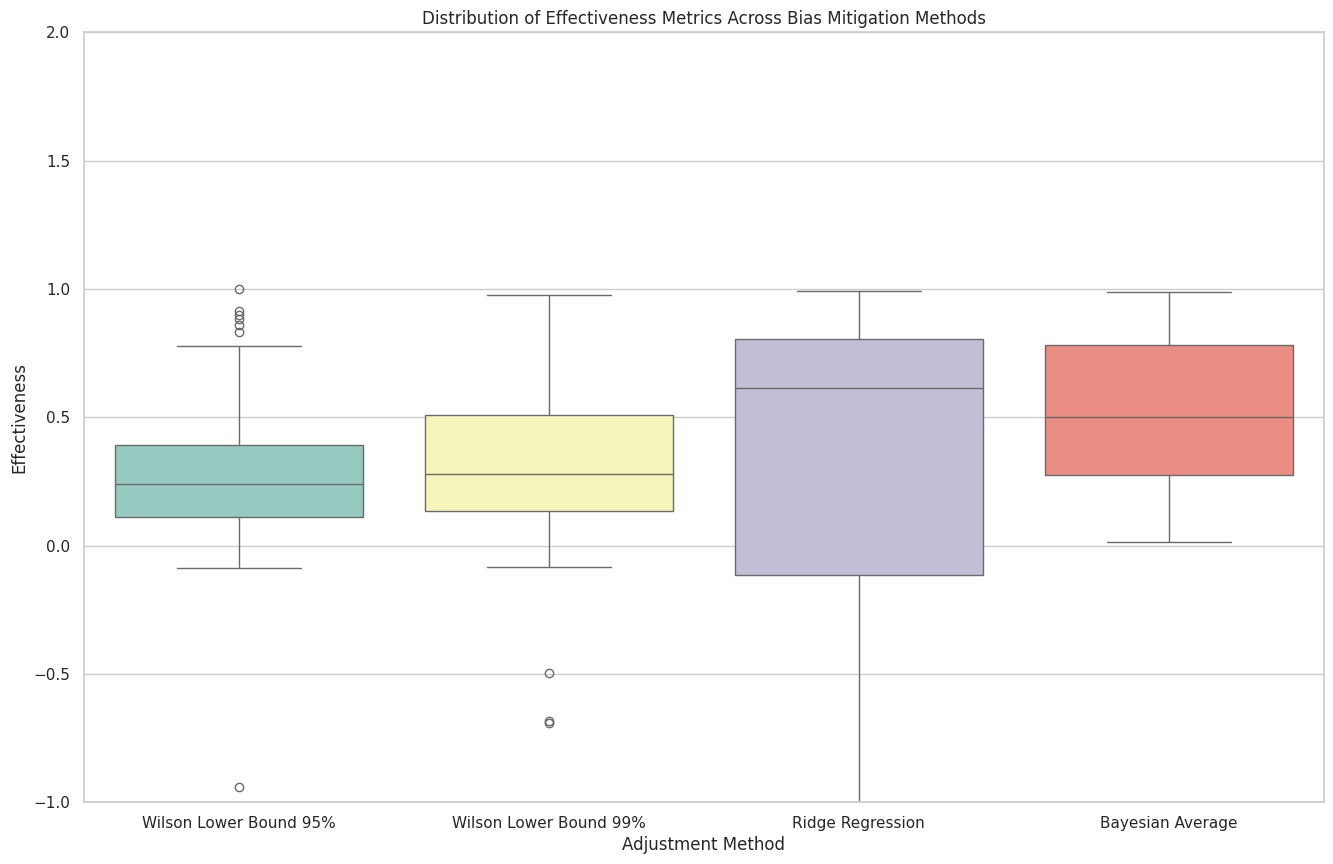

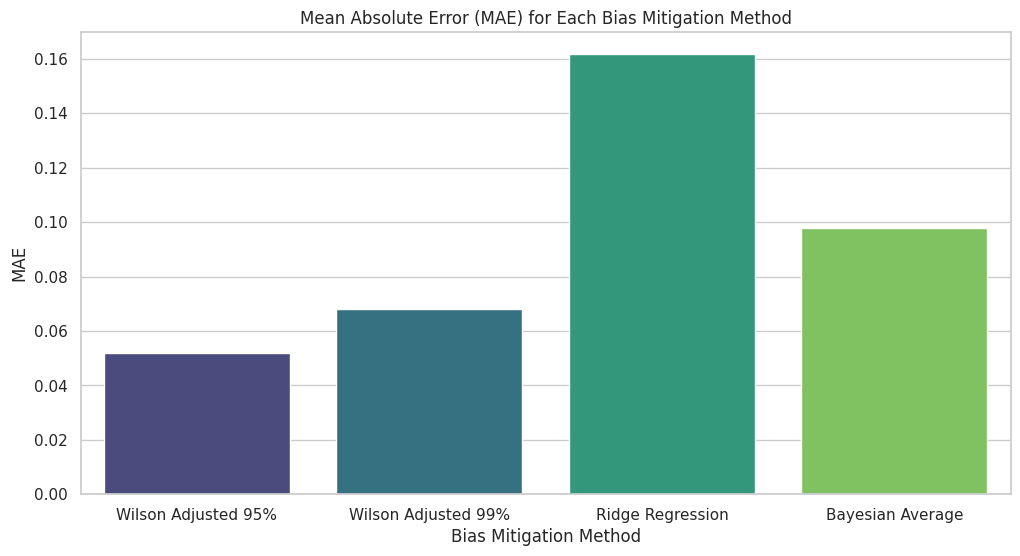

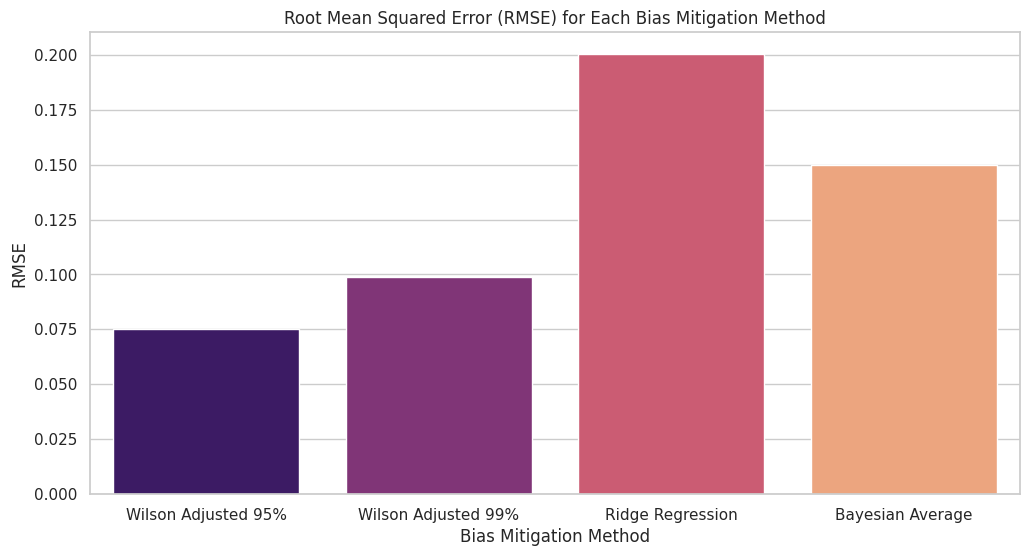

In [173]:
# Plot boxplots for effectiveness metrics
plt.figure(figsize=(16, 10))
sns.boxplot(x='Adjustment_Method', y='Effectiveness', data=df_melted_effectiveness, palette='Set3')
plt.title('Distribution of Effectiveness Metrics Across Bias Mitigation Methods')
plt.xlabel('Adjustment Method')
plt.ylabel('Effectiveness')
plt.ylim(-1, 2)  # Adjust y-axis limits for better visualization
plt.show()

# Plot MAE and RMSE for each method
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='MAE', data=df_error_metrics, palette='viridis')
plt.title('Mean Absolute Error (MAE) for Each Bias Mitigation Method')
plt.xlabel('Bias Mitigation Method')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='RMSE', data=df_error_metrics, palette='magma')
plt.title('Root Mean Squared Error (RMSE) for Each Bias Mitigation Method')
plt.xlabel('Bias Mitigation Method')
plt.ylabel('RMSE')
plt.show()

# Optimizing Wilson Score Adjustment Using Bayesian Optimization

# Composite Popularity Index (CPI)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing the variables
scaler = StandardScaler()
df_goodreads['ReviewsCount_norm'] = scaler.fit_transform(df_goodreads[['ReviewsCount']])
df_goodreads['Popularity_ReadingNow_norm'] = scaler.fit_transform(df_goodreads[['Popularity_ReadingNow']])
df_goodreads['Popularity_Wishlisted_norm'] = scaler.fit_transform(df_goodreads[['Popularity_Wishlisted']])

In [ ]:
# Creating the Composite Popularity Index (CPI)
df_goodreads['CPI'] = (0.4 * df_goodreads['ReviewsCount_norm'] +
                       0.3 * df_goodreads['Popularity_ReadingNow_norm'] +
                       0.3 * df_goodreads['Popularity_Wishlisted_norm'])

In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman correlation between CPI and Empirical_Bayes_Optimal
corr_with_empirical_bayes, p_value = spearmanr(df_goodreads['CPI'], df_goodreads['Empirical_Bayes_Optimal'])

print(f'Spearman Correlation between CPI and Empirical_Bayes_Optimal: {corr_with_empirical_bayes}')
print(f'p-value: {p_value}')

In [ ]:
# Investigating the correlation between CPI subcomponents and Empirical_Bayes_Optimal
subcomponents = ['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']
for component in subcomponents:
    corr, p_value = spearmanr(df_goodreads[component], df_goodreads['Empirical_Bayes_Optimal'])
    print(f"Spearman Correlation between {component} and Empirical_Bayes_Optimal: {corr}, p-value: {p_value}")

In [ ]:
# Adjusting weights of CPI components
df_goodreads['CPI_adjusted'] = (0.5 * df_goodreads['ReviewsCount_norm'] +  # Change weights as needed
                                0.2 * df_goodreads['Popularity_ReadingNow_norm'] +
                                0.3 * df_goodreads['Popularity_Wishlisted_norm'])

# Correlation after adjusting weights
corr_adjusted, p_value_adjusted = spearmanr(df_goodreads['CPI_adjusted'], df_goodreads['Empirical_Bayes_Optimal'])
print(f"Spearman Correlation between CPI_adjusted and Empirical_Bayes_Optimal: {corr_adjusted}, p-value: {p_value_adjusted}")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Load the dataset (with Empirical_Bayes_Optimal column)
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_with_Empirical_Bayes_Optimal.csv')

# Ensure CPI_adjusted_v2 is calculated
df_goodreads['CPI_adjusted_v2'] = (
    0.3 * np.log1p(df_goodreads['ReviewsCount']) +
    0.6 * np.log1p(df_goodreads['Popularity_ReadingNow']) +
    0.1 * np.log1p(df_goodreads['Popularity_Wishlisted'])
)

# Save the dataset with CPI_adjusted_v2
df_goodreads.to_csv('/content/drive/MyDrive/cleaned_goodreads_with_CPI_and_Bayes.csv', index=False)

# Calculate Spearman correlation between Empirical_Bayes_Optimal and CPI_adjusted_v2
spearman_corr, spearman_p = stats.spearmanr(df_goodreads['Empirical_Bayes_Optimal'], df_goodreads['CPI_adjusted_v2'])
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p}")

# Perform regression analysis
X = df_goodreads[['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']]
y = df_goodreads['Empirical_Bayes_Optimal']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualization 1: Scatterplot of CPI vs Empirical Bayes with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='CPI_adjusted_v2', y='Empirical_Bayes_Optimal', data=df_goodreads, scatter_kws={'s':20}, line_kws={'color':'green'})
plt.title('Scatterplot: CPI_adjusted_v2 vs Empirical_Bayes_Optimal')
plt.xlabel('Adjusted Composite Popularity Index (CPI)')
plt.ylabel('Empirical_Bayes_Optimal')
plt.show()

# Visualization 2: Boxplot for outliers and distribution
plt.figure(figsize=(8,6))
sns.boxplot(x='Empirical_Bayes_Optimal', data=df_goodreads)
plt.title('Boxplot of Empirical_Bayes_Optimal')
plt.show()

# Visualization 3: Distribution of CPI and Empirical Bayes Optimal
plt.figure(figsize=(8,6))
sns.histplot(df_goodreads['CPI_adjusted_v2'], kde=True, color='blue', label='CPI_adjusted_v2', alpha=0.5)
sns.histplot(df_goodreads['Empirical_Bayes_Optimal'], kde=True, color='red', label='Empirical_Bayes_Optimal', alpha=0.5)
plt.legend()
plt.title('Distribution Comparison: CPI vs Empirical Bayes Optimal')
plt.show()

# Additional tests: Shapiro-Wilk test for normality of CPI_adjusted_v2 and Empirical_Bayes_Optimal
shapiro_cpi = stats.shapiro(df_goodreads['CPI_adjusted_v2'])
shapiro_emp_bayes = stats.shapiro(df_goodreads['Empirical_Bayes_Optimal'])
print(f"Shapiro-Wilk test for CPI_adjusted_v2: {shapiro_cpi}")
print(f"Shapiro-Wilk test for Empirical_Bayes_Optimal: {shapiro_emp_bayes}")

In [ ]:
# Calculate adjusted Composite Popularity Index (CPI)
df_goodreads_updated['CPI_adjusted_v2'] = (
    0.3 * np.log1p(df_goodreads_updated['ReviewsCount']) +
    0.6 * np.log1p(df_goodreads_updated['Popularity_ReadingNow']) +
    0.1 * np.log1p(df_goodreads_updated['Popularity_Wishlisted'])
)

# Save the updated dataset with CPI to a new CSV file
df_goodreads_updated.to_csv('/content/drive/MyDrive/cleaned_goodreads_with_Empirical_Bayes_Optimal_and_CPI.csv', index=False)

print("CPI column added and saved successfully.")

# Check the columns of the dataset
print(df_goodreads_updated.columns)

In [ ]:
df_goodreads_updated = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_with_Empirical_Bayes_Optimal_and_CPI.csv')
df_goodreads_updated.head()